In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [183]:
# Read the CSV file. Adjust the filename and separator if needed.
df = pd.read_csv("Results_no_oversampling.csv", sep=';')

# Inspect the DataFrame (optional)
print(df.head())

  Model                                      Baseline Timepoint  \
0   PCA                                Recall@5: 0.00        S1   
1   PCA                      MSE: 0.05799181014299393        S1   
2   PCA            Mean Clonotype Activation: -0.0110        S1   
3   PCA  Mean Clonotype Activation Predicted: -0.0216        S1   
4   PCA                                           NaN        S1   

                               Timepoint LinReg  \
0                                Recall@5: 0.20   
1                     MSE: 0.033736078214546564   
2     MSE- Clonotype mean: 0.033736078214546564   
3            Mean Clonotype Activation: -0.0136   
4  Mean Clonotype Activation Predicted: -0.0376   

                                  Timepoint GBR  \
0                                Recall@5: 0.20   
1                      MSE: 0.04077866010989528   
2      MSE- Clonotype mean: 0.04077866010989528   
3            Mean Clonotype Activation: -0.0136   
4  Mean Clonotype Activation Predic

In [184]:
# Melt the DataFrame so that "Baseline" and "Timepoint LinReg" become rows.
df_long = df.melt(id_vars=["Model", "Timepoint"], 
                  var_name="Method", 
                  value_name="MetricData")

# Define a function that parses each metric string.
# It uses the "Timepoint" value to remove the "for <Timepoint>" part.
def parse_metric_row(row):
    cell = row["MetricData"]
    timepoint = row["Timepoint"]
    if not isinstance(cell, str):
        return pd.Series({"Metric": None, "Value": None})
    # Remove the "for <Timepoint>" substring, e.g., " for S1"
    pattern_for = fr"\s+for\s+{timepoint}"
    cell_clean = re.sub(pattern_for, "", cell)
    # Remove the "in <Timepoint>" substring, e.g., " for S1"
    pattern_in = fr"\s+in\s+{timepoint}"
    cell_clean = re.sub(pattern_in, "", cell)
    # Also remove any occurrence of " (<timepoint>)", e.g., " (S1)"
    pattern_bracket = fr"\s*\({timepoint}\)"
    cell_clean = re.sub(pattern_bracket, "", cell_clean)
    
    
    # Split the cleaned string on the colon to separate the metric name and value.
    parts = cell_clean.split(":")
    if len(parts) == 2:
        metric_text = parts[0].strip()
        try:
            value = float(parts[1].strip())
        except ValueError:
            value = None
        return pd.Series({"Metric": metric_text, "Value": value})
    else:
        return pd.Series({"Metric": None, "Value": None})
    
# Apply the parsing function row-wise to get new columns.
df_long = df_long.join(df_long.apply(parse_metric_row, axis=1))

# Optionally, drop the original "MetricData" column.
df_long.drop(columns=["MetricData"], inplace=True)

print(df_long.head())

  Model Timepoint    Method                               Metric     Value
0   PCA        S1  Baseline                             Recall@5  0.000000
1   PCA        S1  Baseline                                  MSE  0.057992
2   PCA        S1  Baseline            Mean Clonotype Activation -0.011000
3   PCA        S1  Baseline  Mean Clonotype Activation Predicted -0.021600
4   PCA        S1  Baseline                                 None       NaN


In [185]:
df_long['Metric'].unique()
df_long = df_long.dropna()

In [186]:
drop_values = ['Mean Clonotype Activation', 'Mean Clonotype Activation Predicted', 'MSE- Mean']
df_long = df_long[~df_long['Metric'].isin(drop_values)]

In [187]:
df_long

,Model,Timepoint,Method,Metric,Value
0,PCA,S1,Baseline,Recall@5,0.000000
1,PCA,S1,Baseline,MSE,0.057992
7,PCA,T1,Baseline,Recall@5,0.000000
8,PCA,T1,Baseline,MSE,0.113631
14,deepTCR,S1,Baseline,Recall@5,0.000000
...,...,...,...,...,...
973,mvTCR + deepTCR + PCA,T1,OT RF,Recall@5,0.800000
974,mvTCR + deepTCR + PCA,T1,OT RF,MSE,0.010160
975,mvTCR + deepTCR + PCA,T1,OT RF,MSE- Clonotype mean,0.010160
978,mvTCR + deepTCR + PCA,T1,OT RF,MSE for bottom 25% (low-responding clones),0.007900


In [188]:
df = df_long

In [189]:
# We pick a single blue for Baseline
baseline_color = "#1f77b4"  # standard matplotlib 'blue'

# Create 3 greens for Donor
greens = sns.color_palette("Greens", 3)
# Create 3 oranges for OT
turquoises = sns.color_palette("Greys", 3)
# Create 3 red for OT
reds = sns.color_palette("Oranges", 3)

color_dict = {
    "Baseline": baseline_color,

    # Donor methods (greens)
    "Timepoint LinReg": greens[0],
    "Timepoint GBR":   greens[1],
    "Timepoint RF":    greens[2],

    # Donor methods (greens)
    "Donor LinReg": turquoises[0],
    "Donor GBR":   turquoises[1],
    "Donor RF":    turquoises[2],

    # OT methods (oranges)
    "OT LinReg": reds[0],
    "OT GBR":   reds[1],
    "OT RF":    reds[2]
}

In [190]:
df_recall = df[df['Metric'] == 'Recall@5']

df_S1 = df_recall[df_recall['Timepoint'] == 'S1']
df_T1 = df_recall[df_recall['Timepoint'] == 'T1']

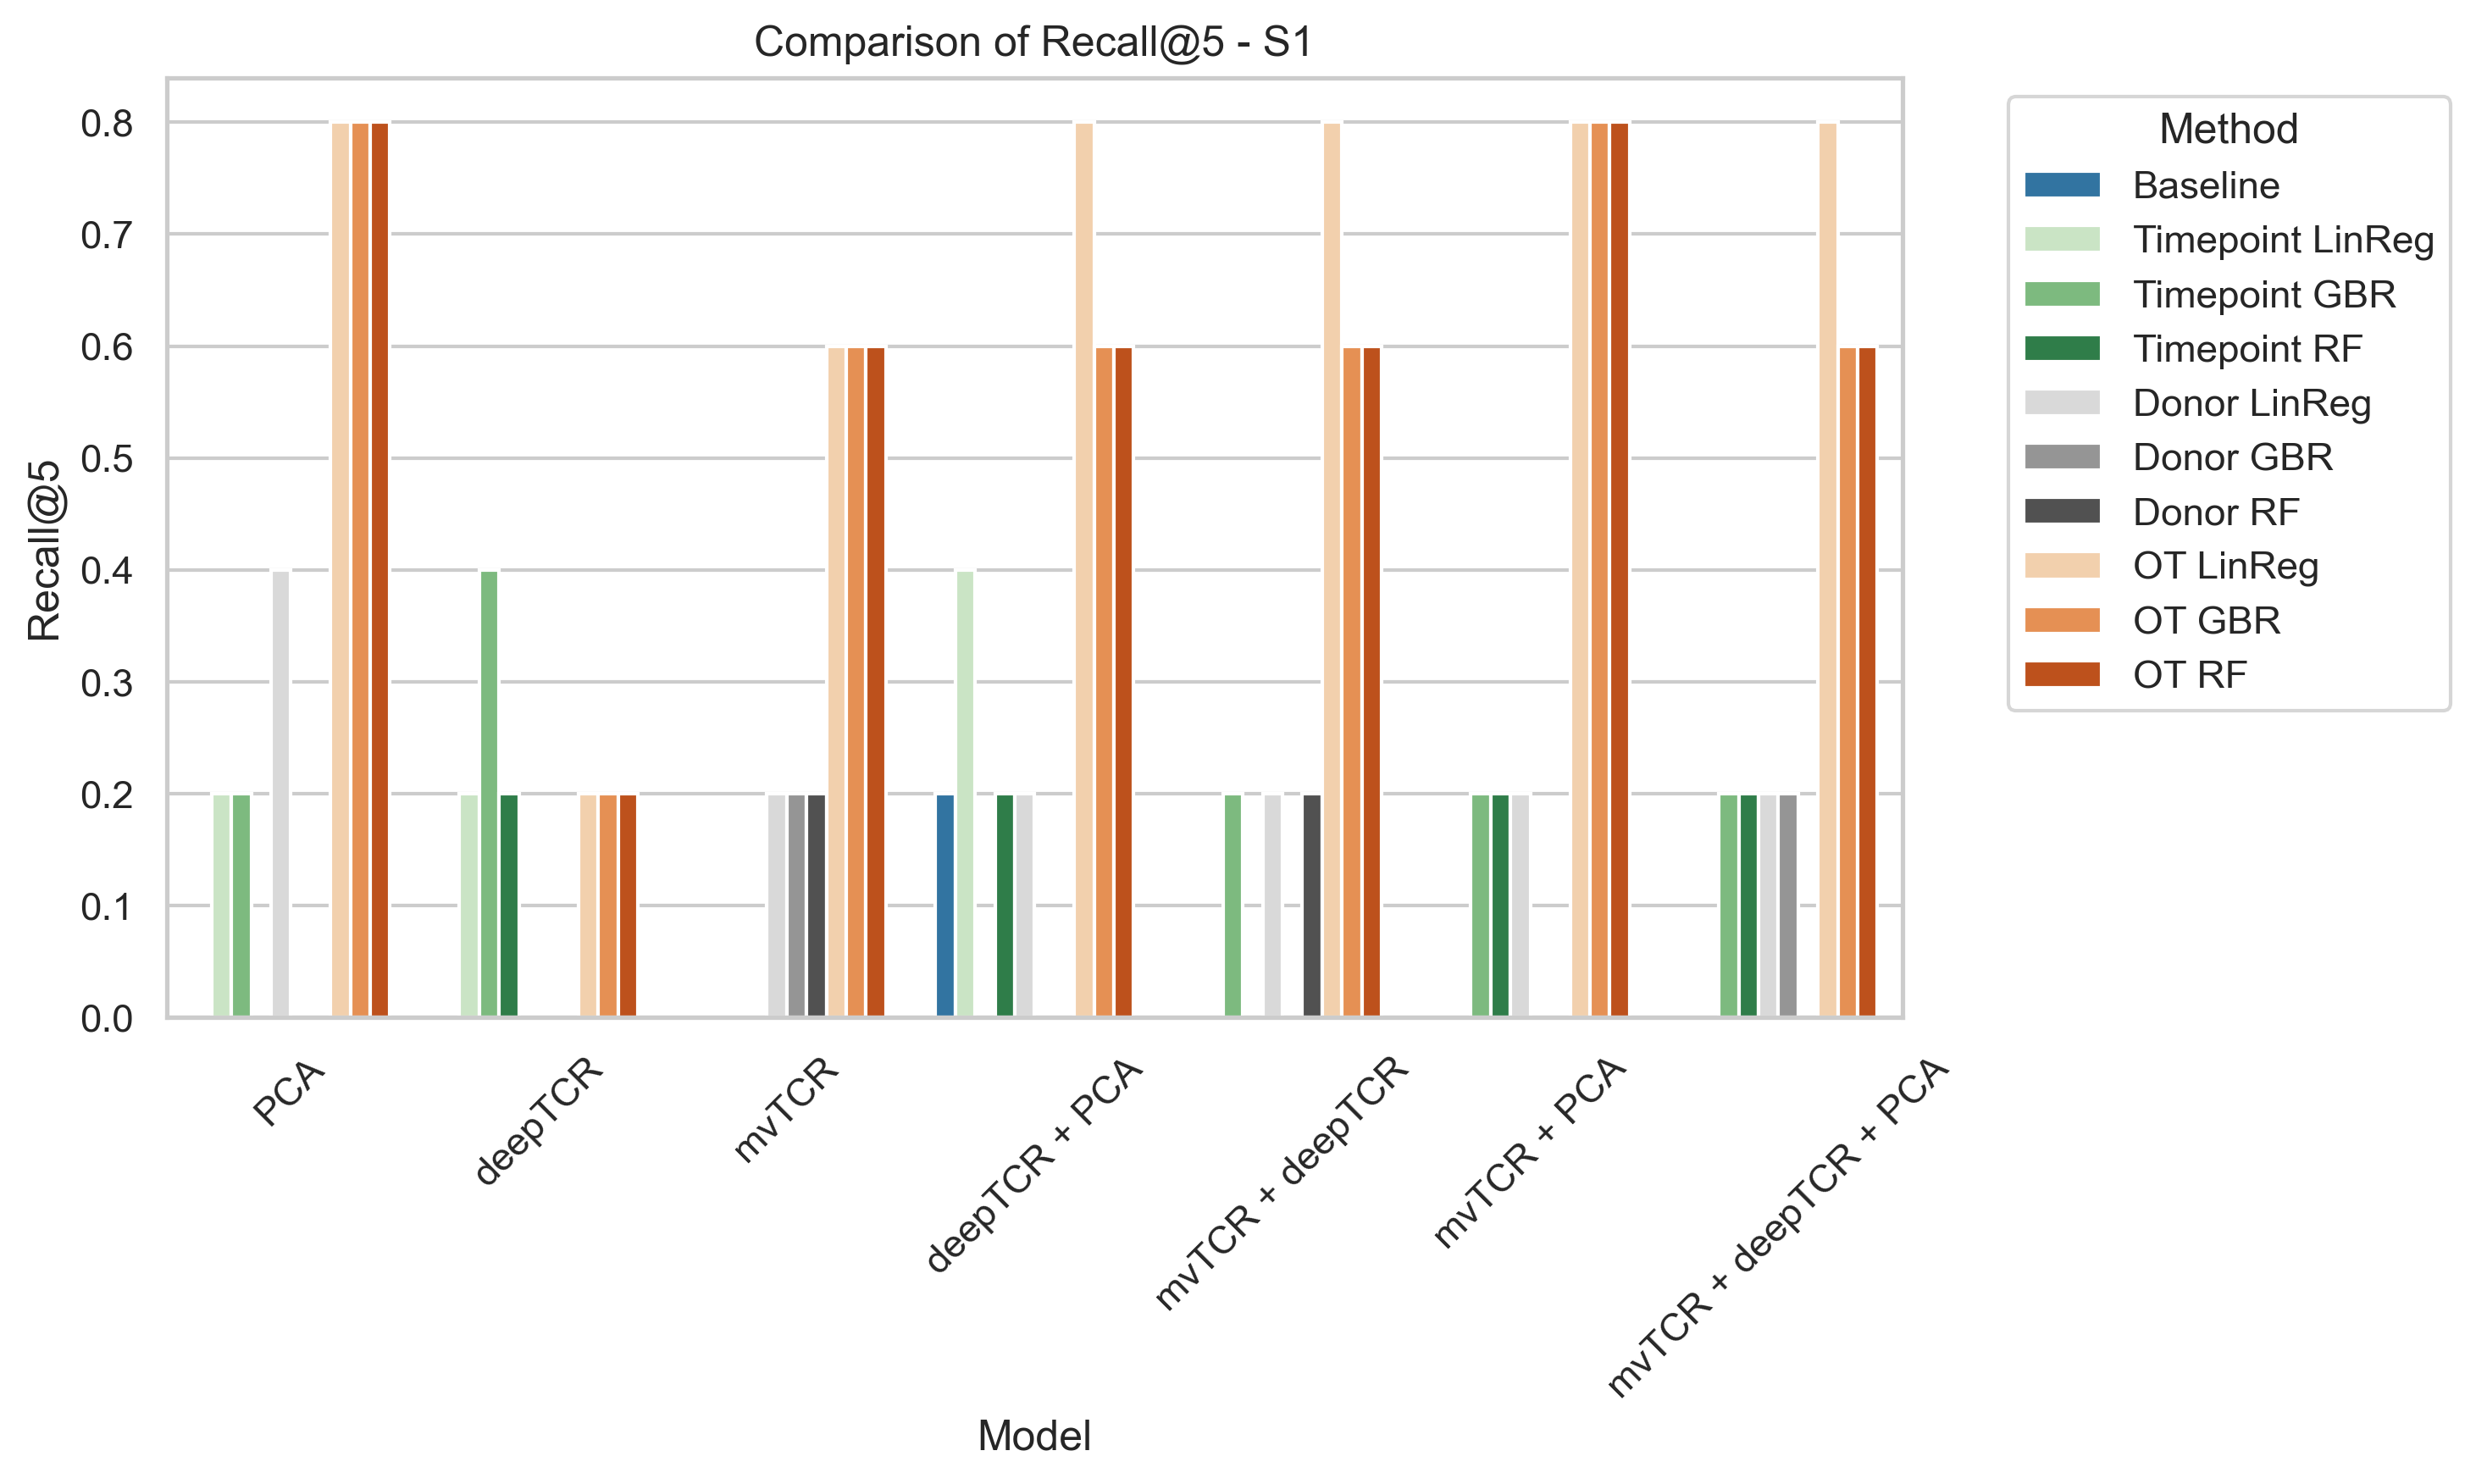

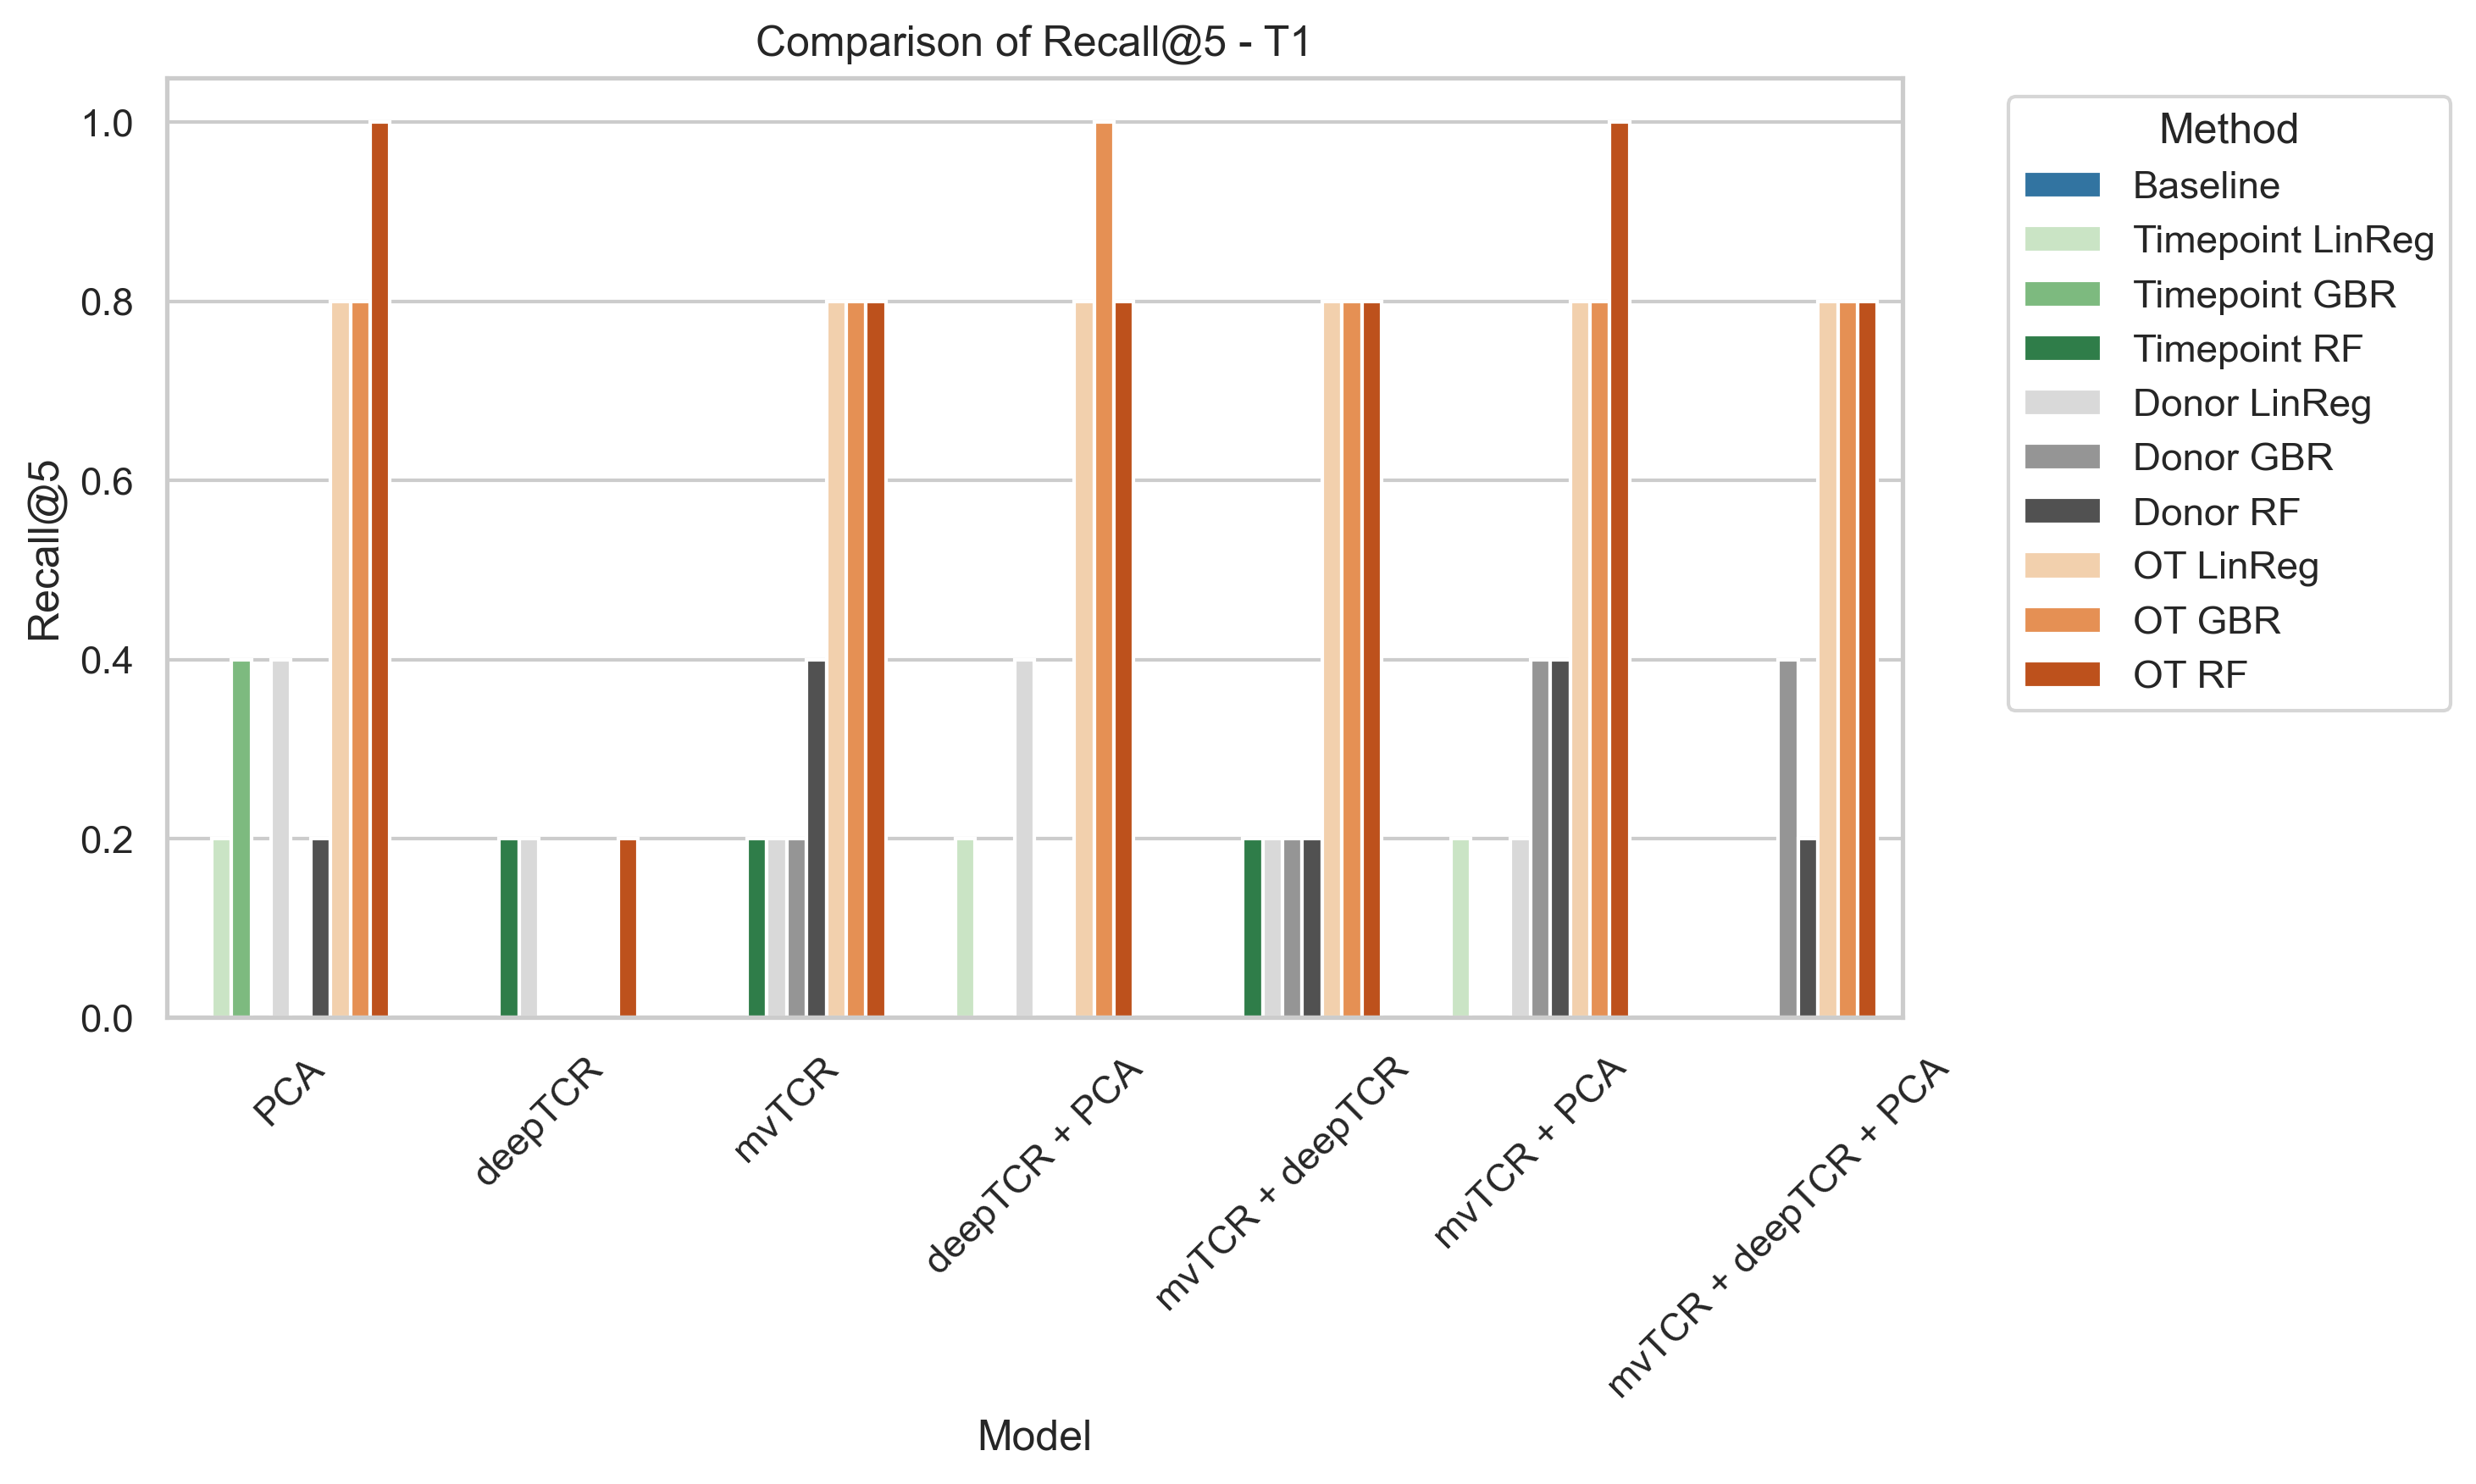

In [191]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_S1, 
    x='Model', 
    y='Value', 
    hue='Method',
    palette=color_dict
)
plt.title('Comparison of Recall@5 - S1')
plt.xlabel('Model')
plt.ylabel('Recall@5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Repeat for T1
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_T1, 
    x='Model', 
    y='Value', 
    hue='Method',
    palette=color_dict
)
plt.title('Comparison of Recall@5 - T1')
plt.xlabel('Model')
plt.ylabel('Recall@5')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [192]:
# Filter rows where Metric == 'MSE'
df_mse = df[df['Metric'] == 'MSE']

# Split by timepoint
df_S1 = df_mse[df_mse['Timepoint'] == 'S1']
df_T1 = df_mse[df_mse['Timepoint'] == 'T1']


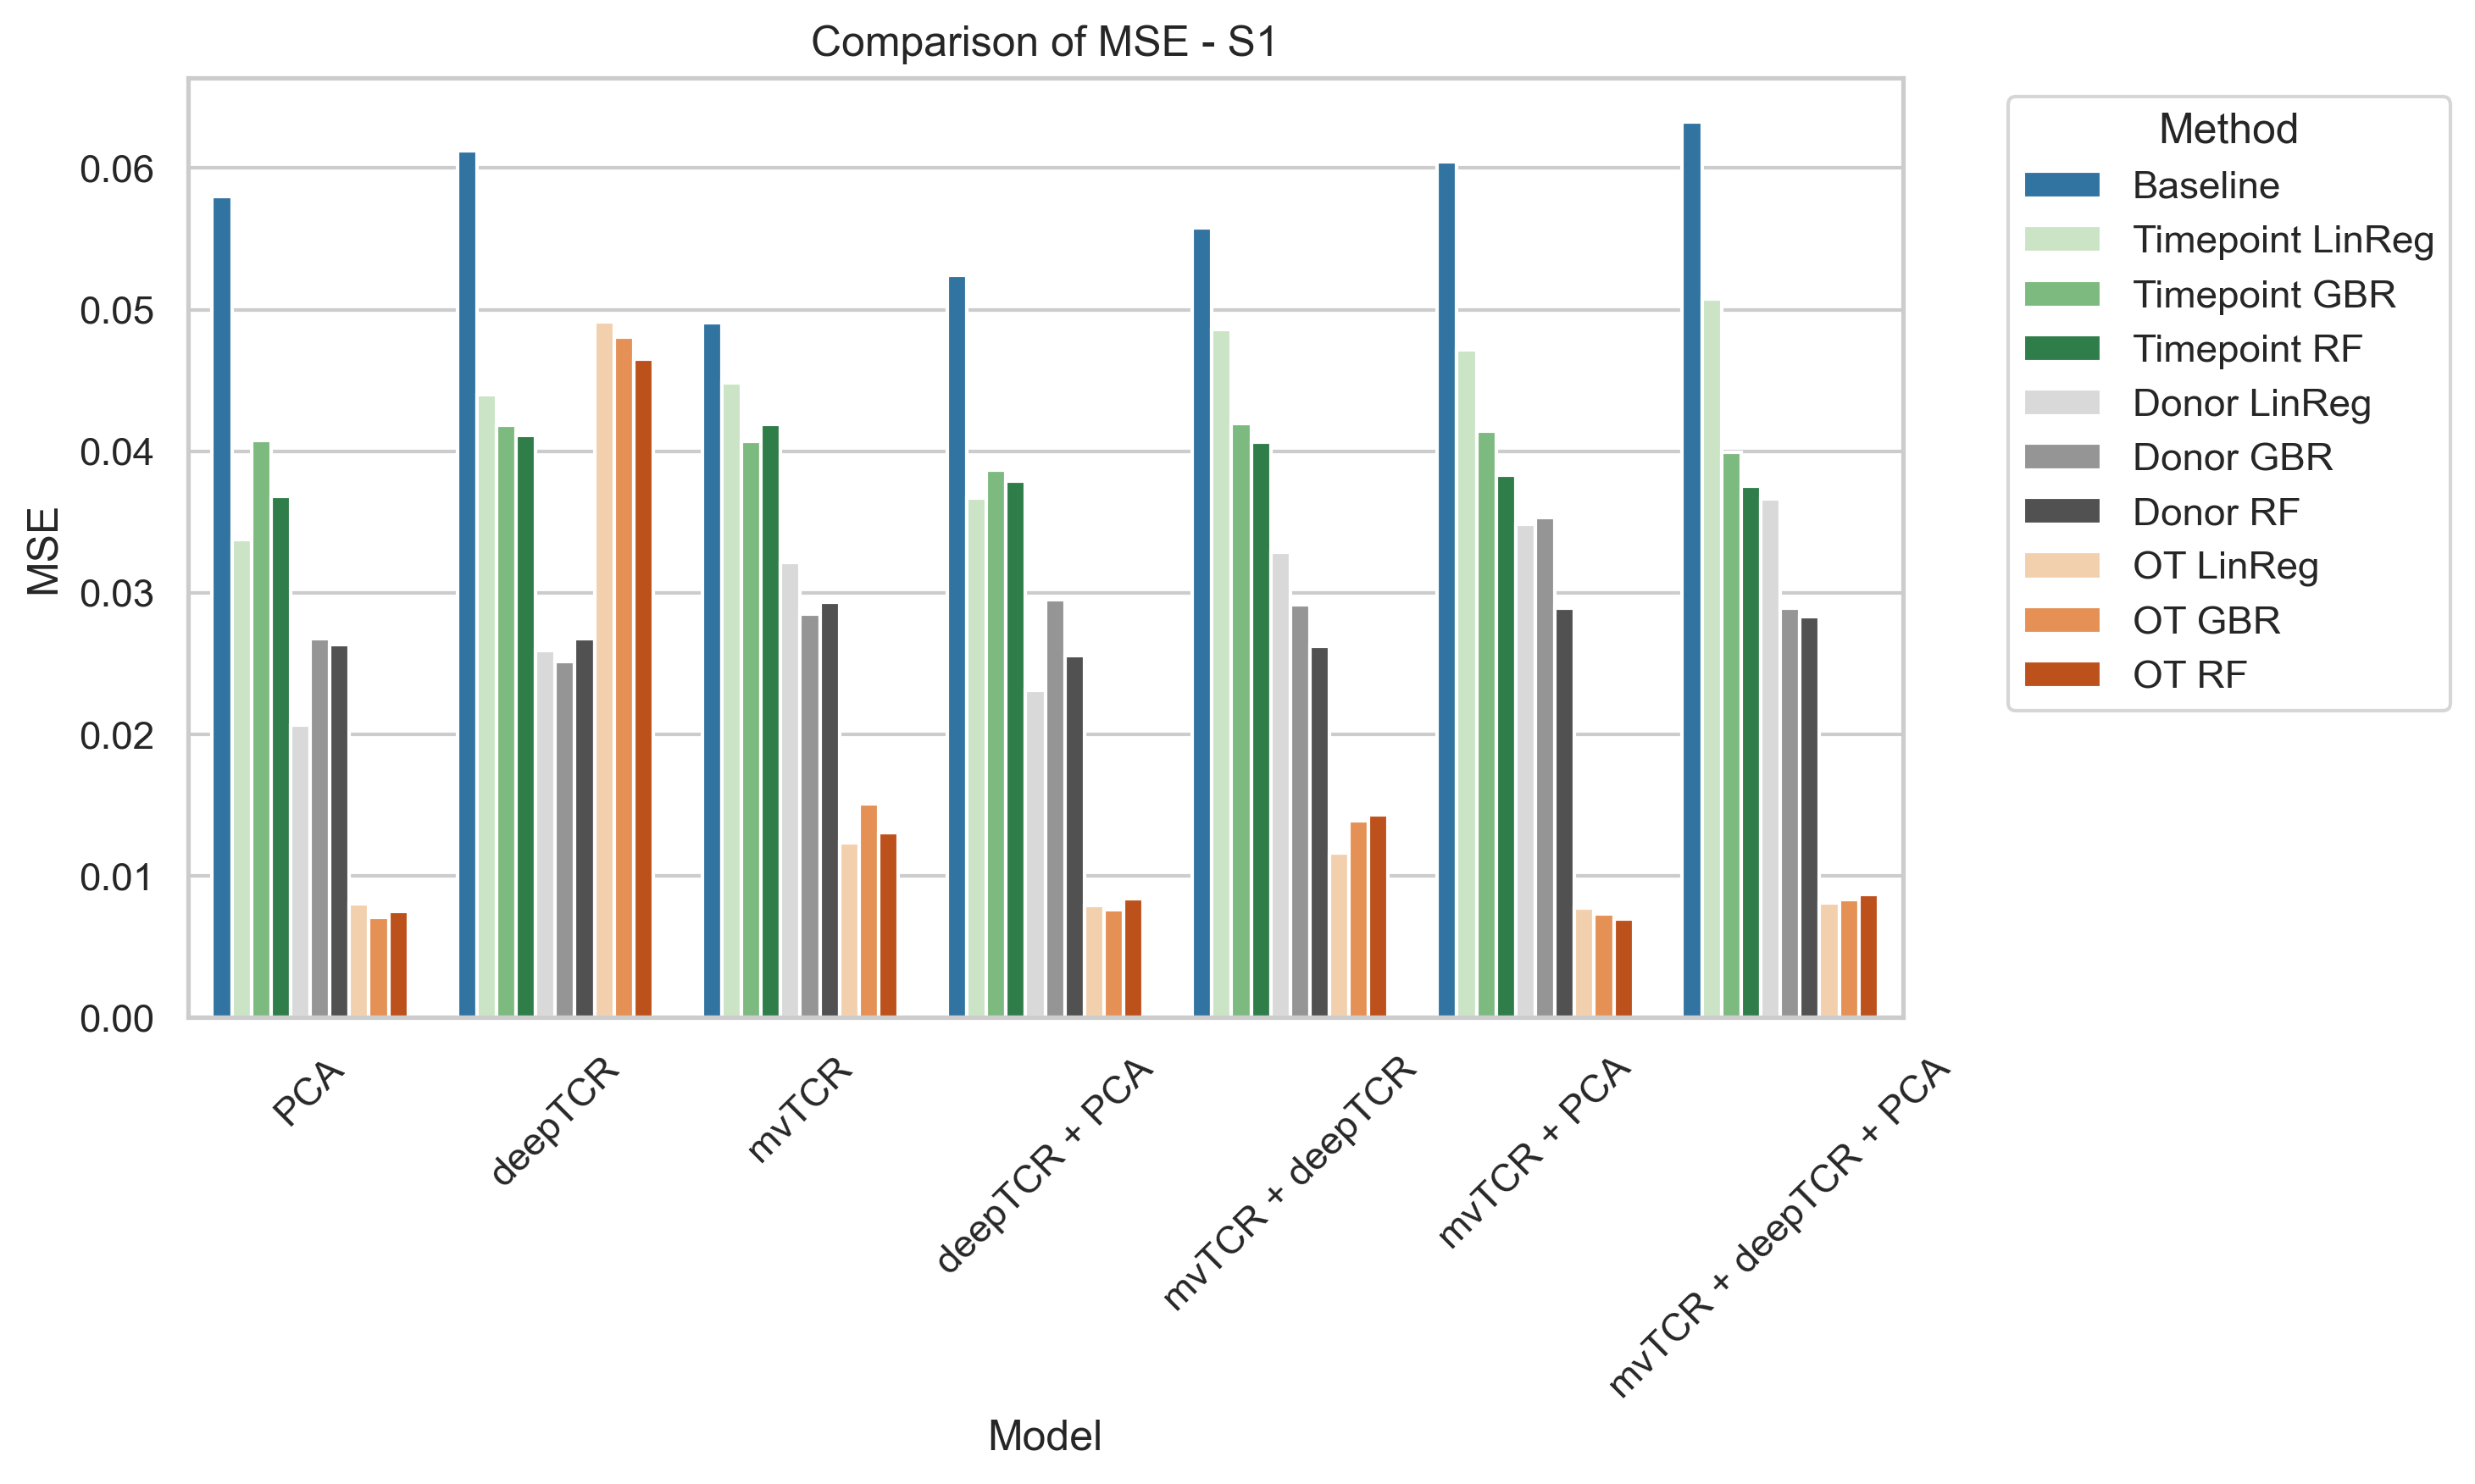

In [193]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_S1, 
    x='Model', 
    y='Value', 
    hue='Method',
    errorbar=None,  # or some function if you have repeated measures
    palette=color_dict
)
plt.title('Comparison of MSE - S1')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


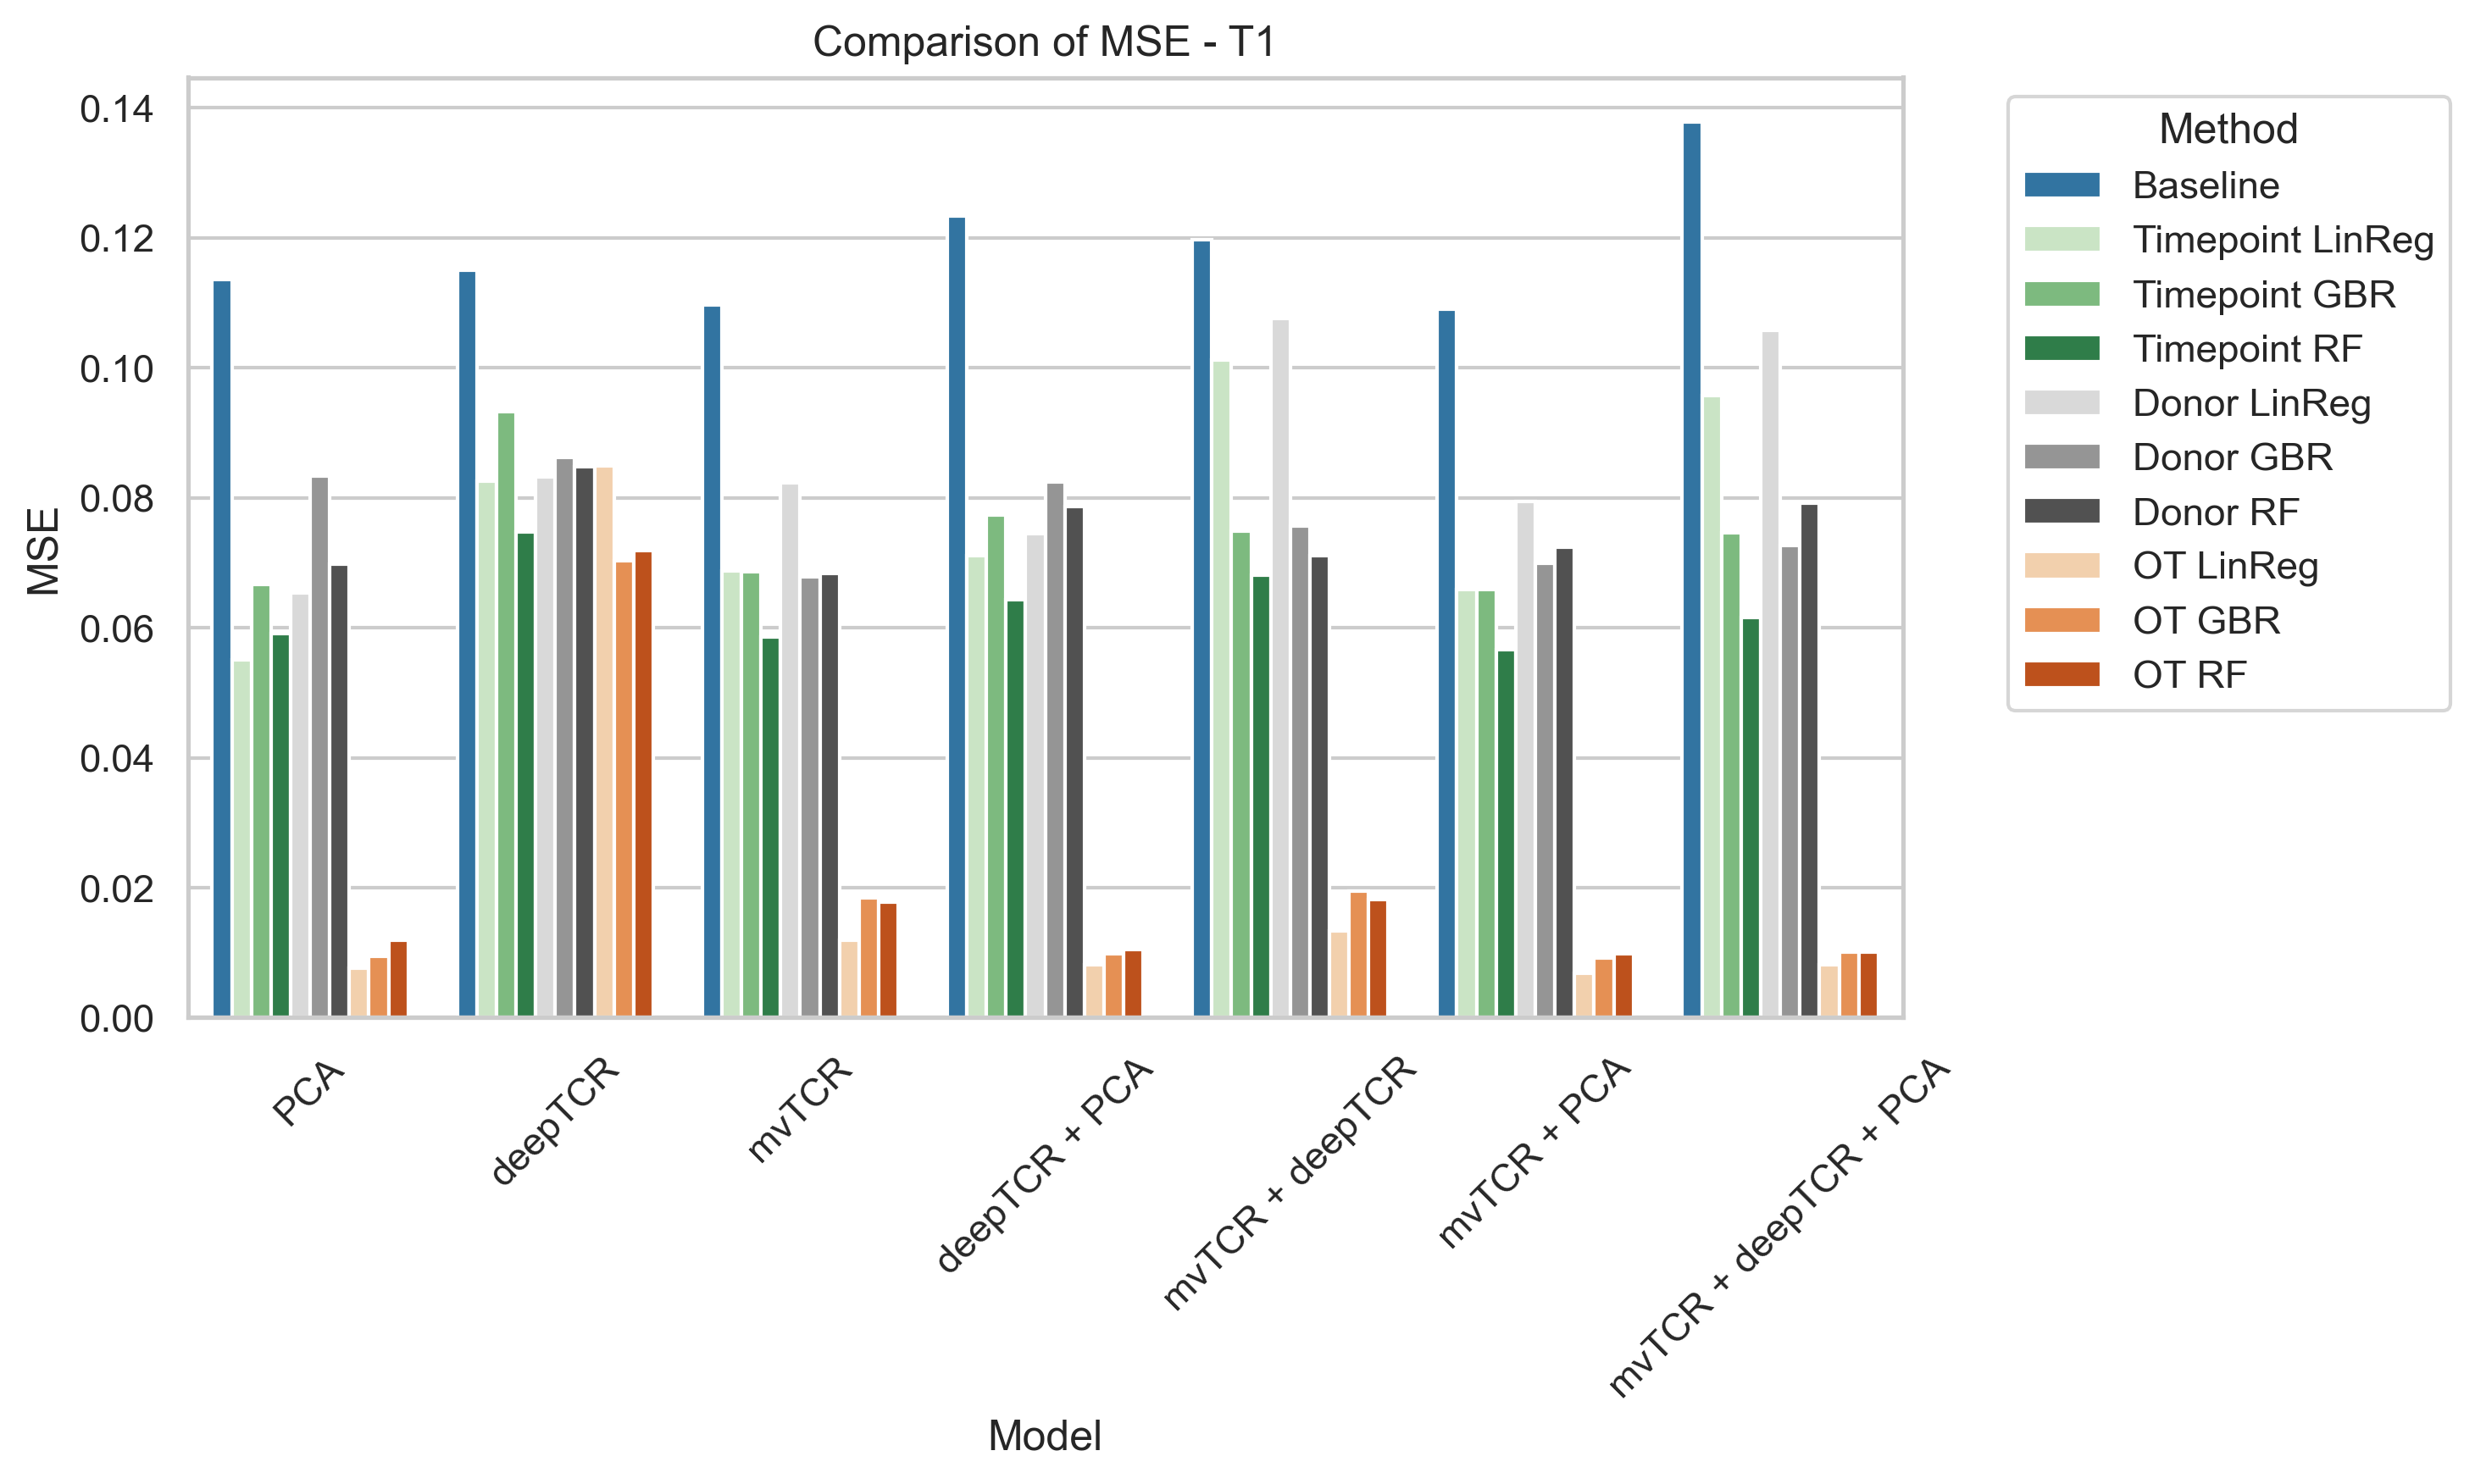

In [194]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_T1, 
    x='Model', 
    y='Value', 
    hue='Method', 
    palette=color_dict
)
plt.title('Comparison of MSE - T1')
plt.xlabel('Model')
plt.ylabel('MSE')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [195]:
# Keep only rows where Metric == 'MSE for top 25% (high-responding clones)'
df_mse_top25 = df[df['Metric'] == 'MSE for top 25% (high-responding clones)']

# Separate by timepoint
df_S1 = df_mse_top25[df_mse_top25['Timepoint'] == 'S1']
df_T1 = df_mse_top25[df_mse_top25['Timepoint'] == 'T1']


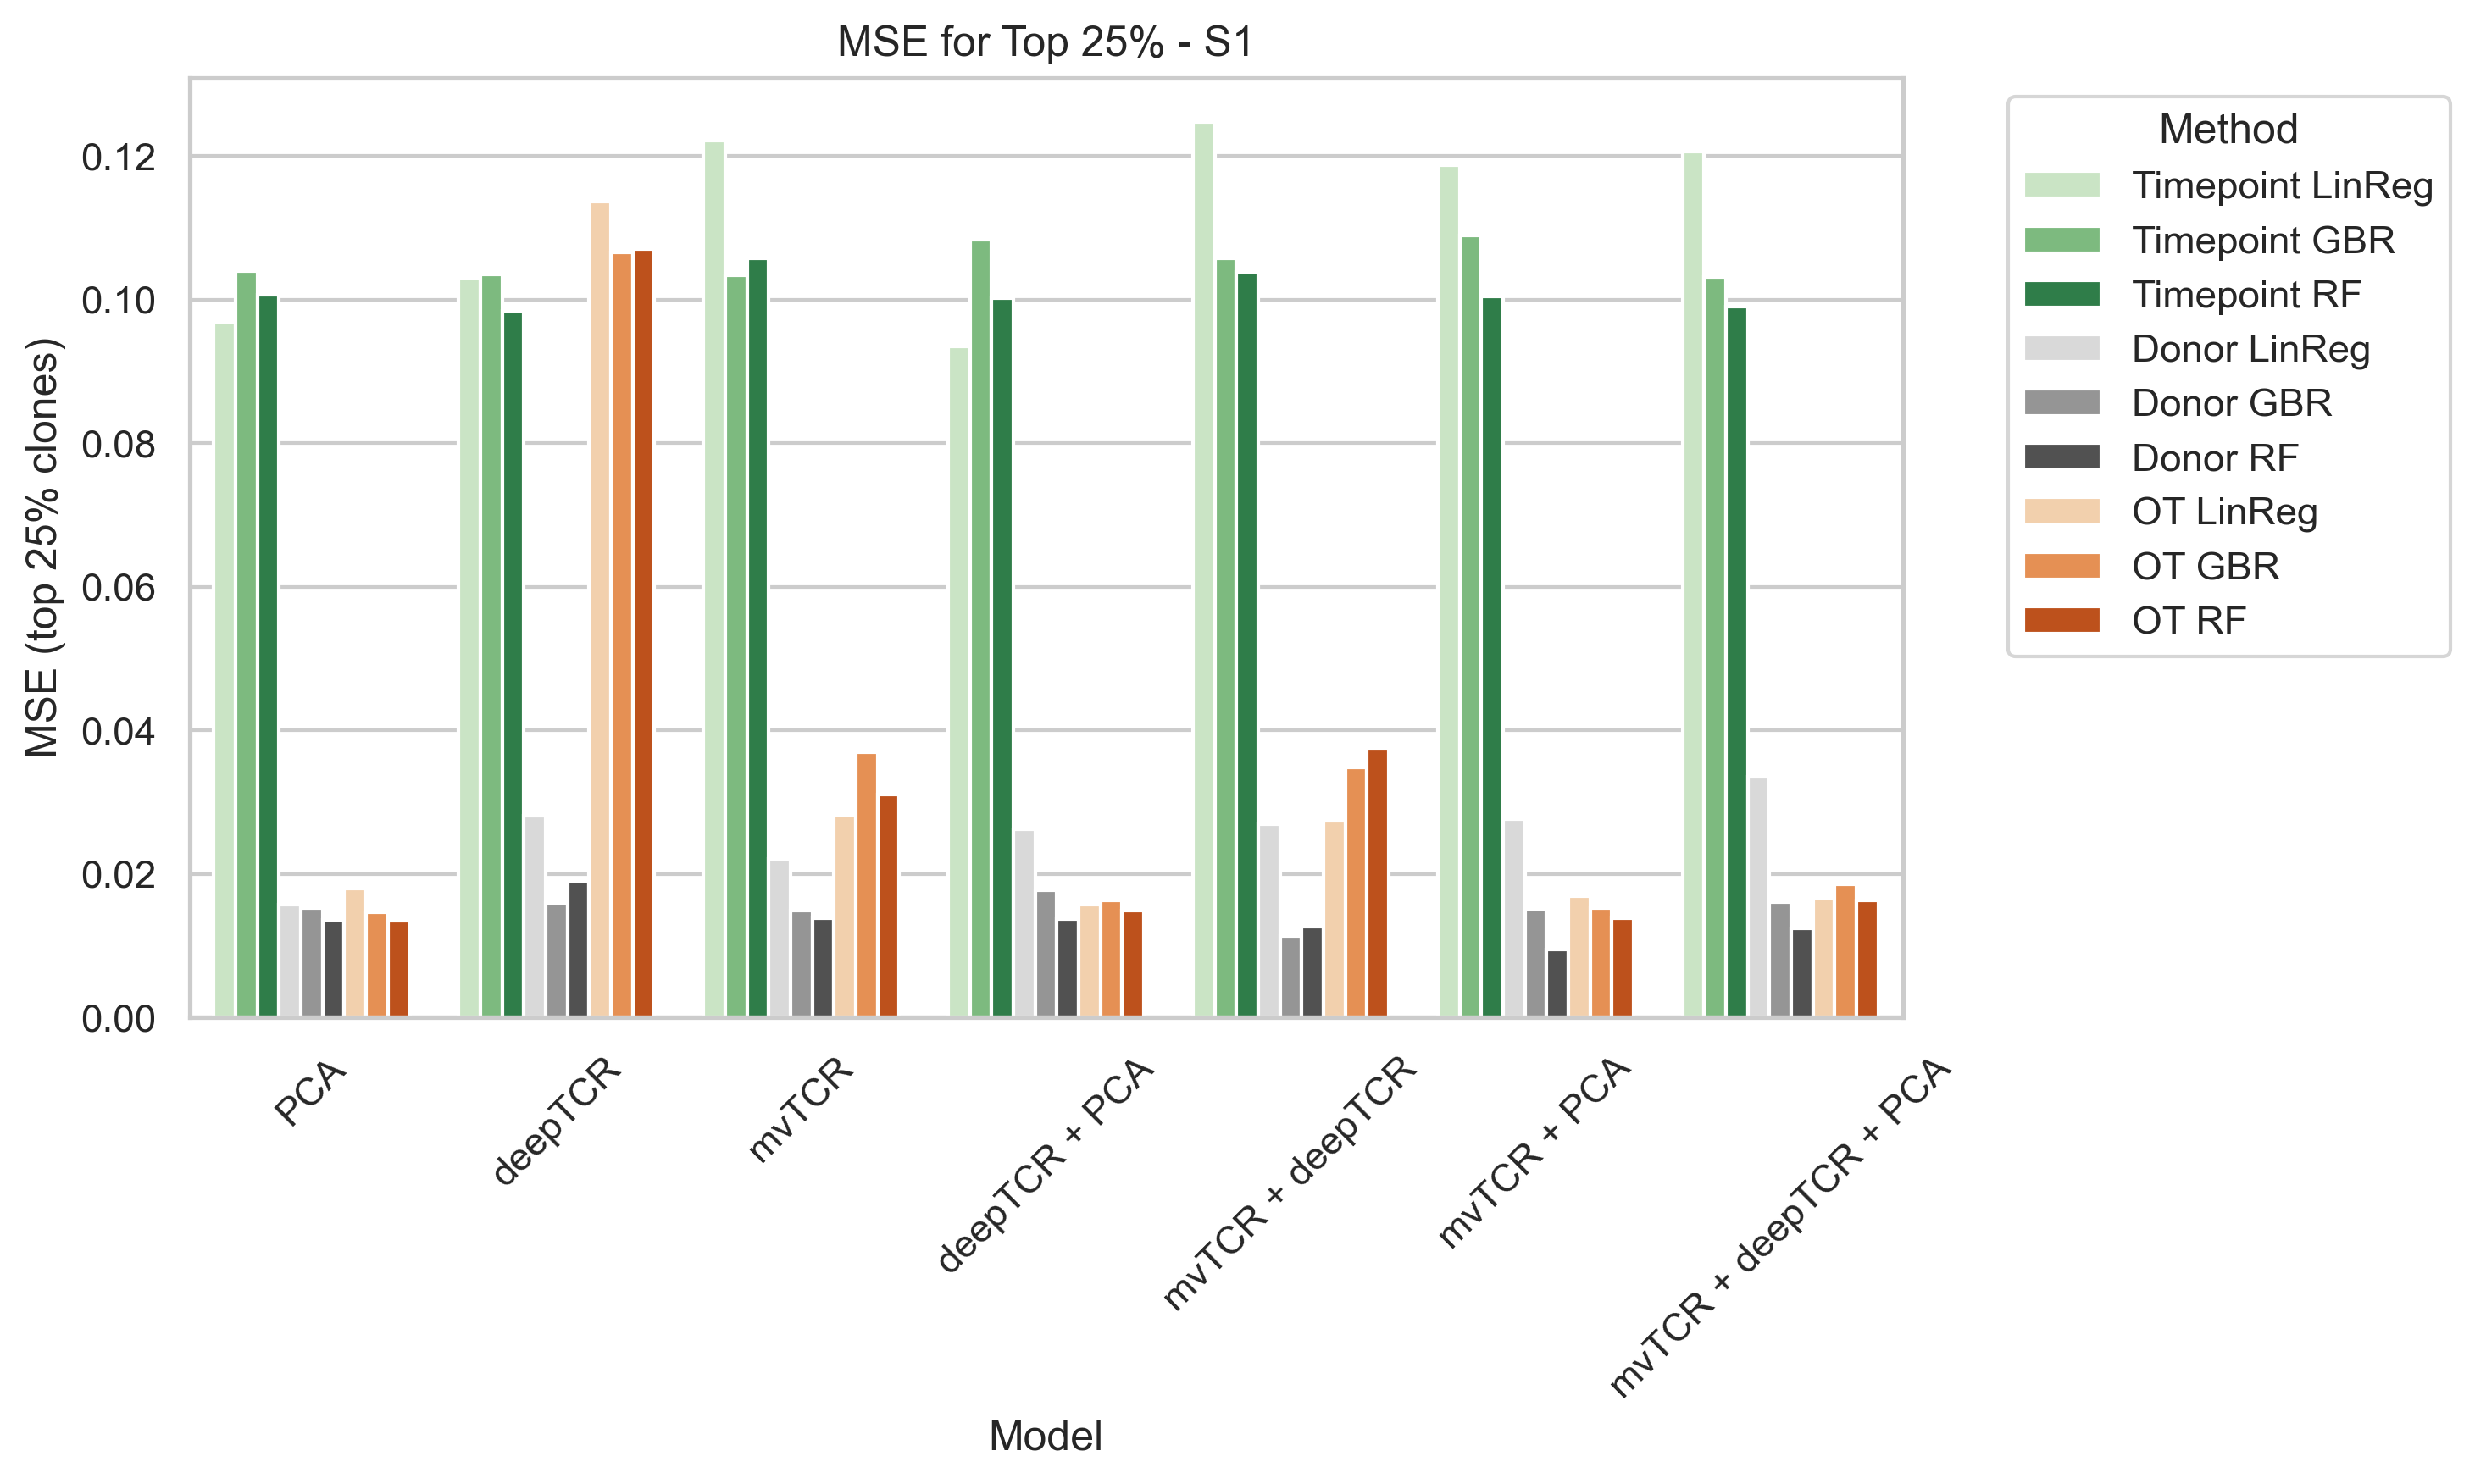

In [196]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_S1, 
    x='Model', 
    y='Value', 
    hue='Method',
    palette=color_dict
)
plt.title('MSE for Top 25% - S1')
plt.xlabel('Model')
plt.ylabel('MSE (top 25% clones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


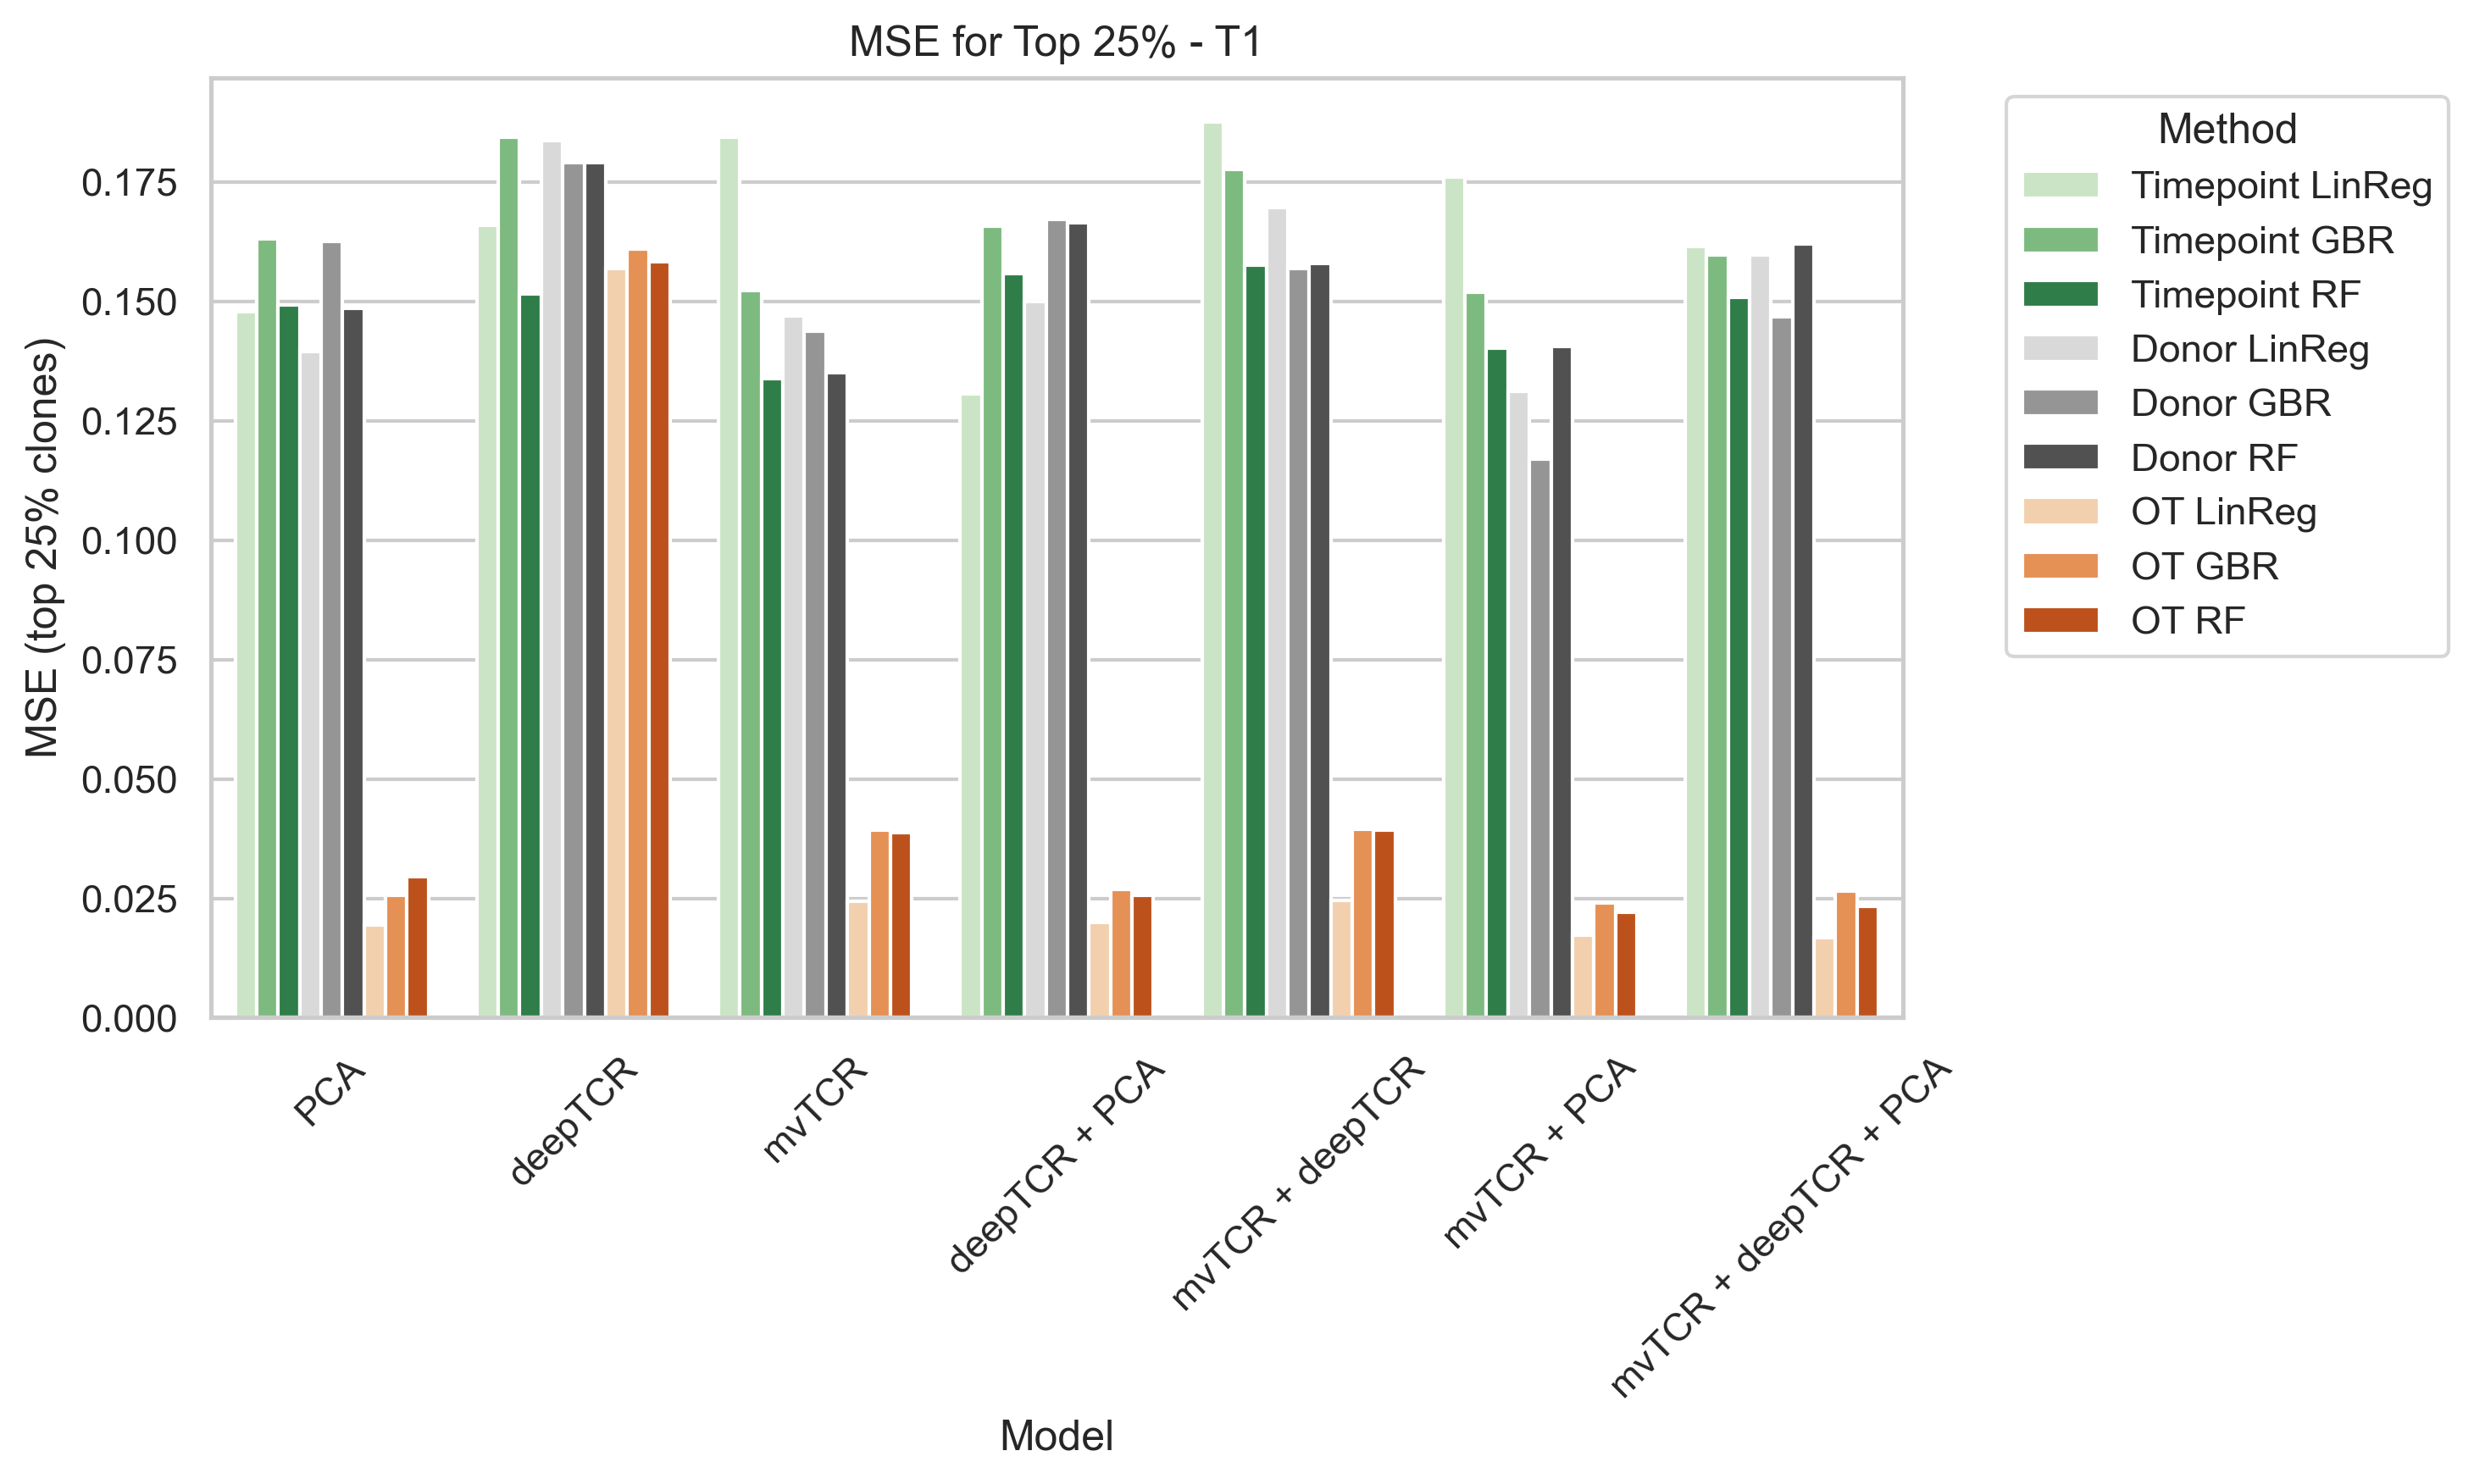

In [197]:
plt.figure(figsize=(8, 6))
sns.barplot(
    data=df_T1, 
    x='Model', 
    y='Value', 
    hue='Method',
    palette=color_dict
)
plt.title('MSE for Top 25% - T1')
plt.xlabel('Model')
plt.ylabel('MSE (top 25% clones)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [198]:
# Example filtering:
df_subset = df[
    df['Model'].isin(['PCA', 'deepTCR + PCA']) &
    df['Method'].str.startswith('OT')
]

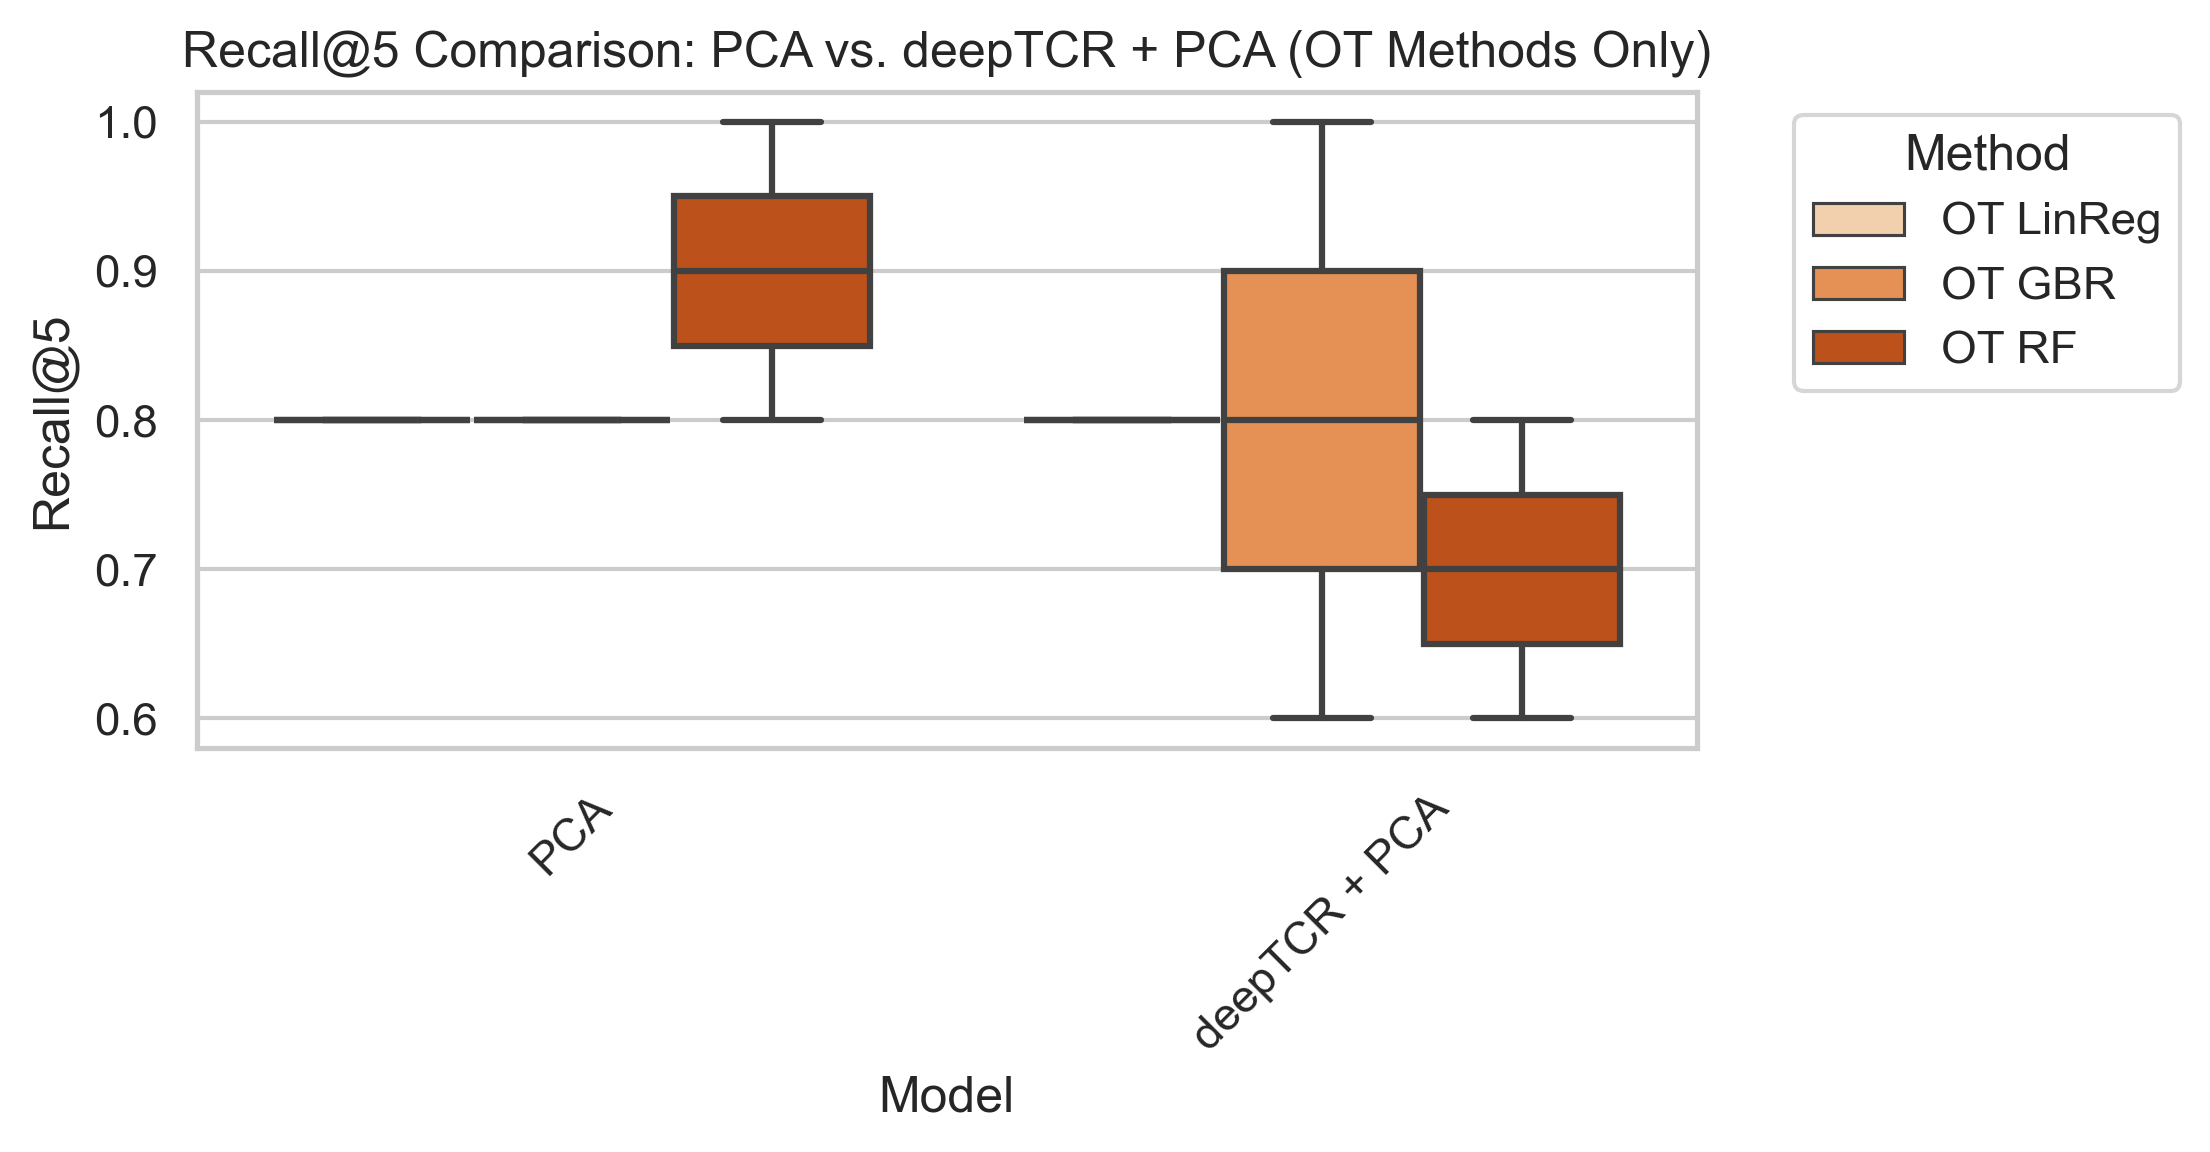

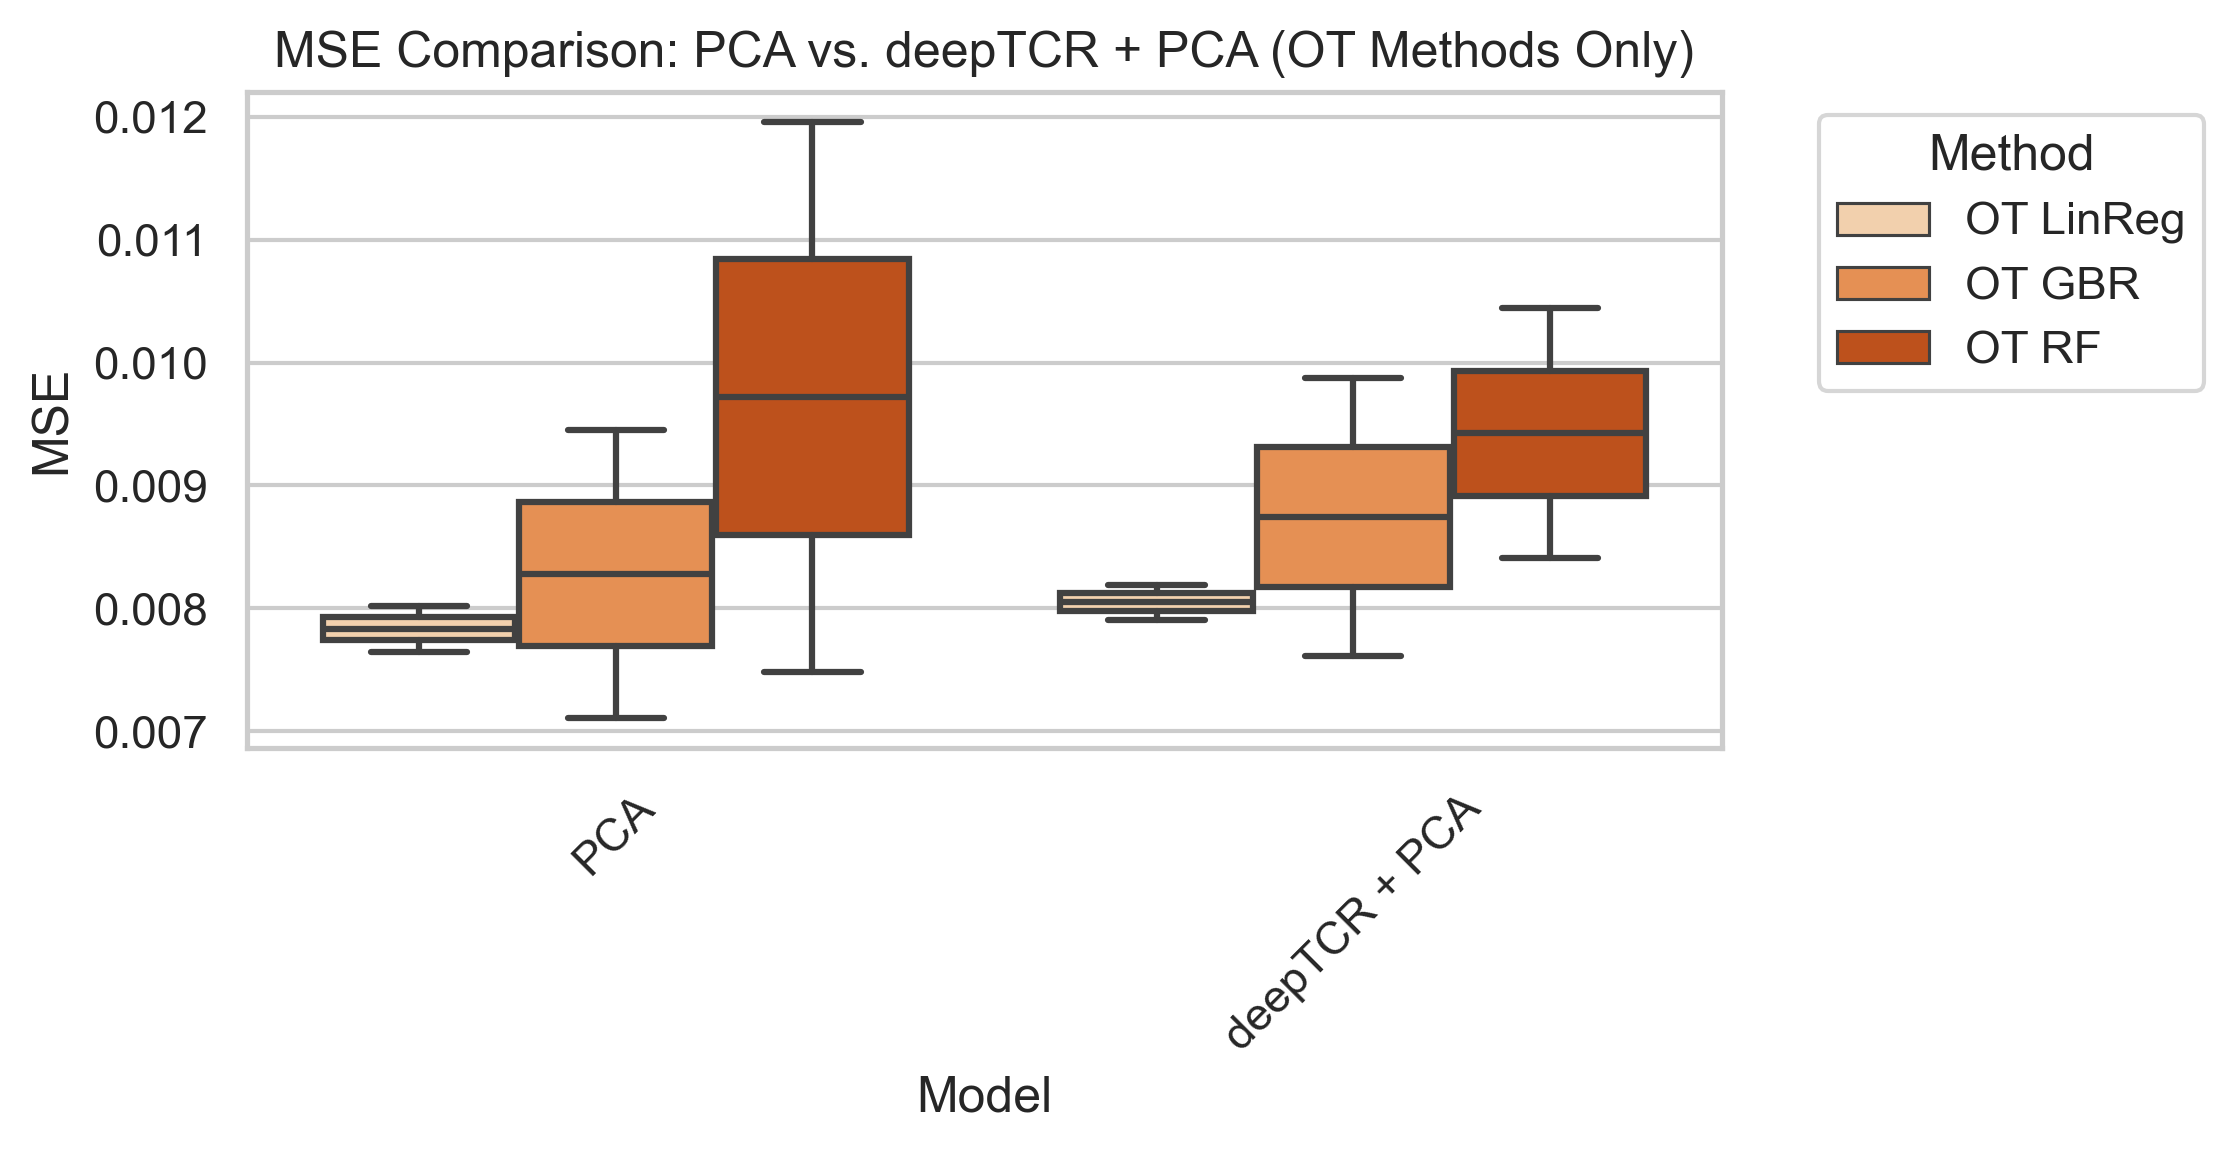

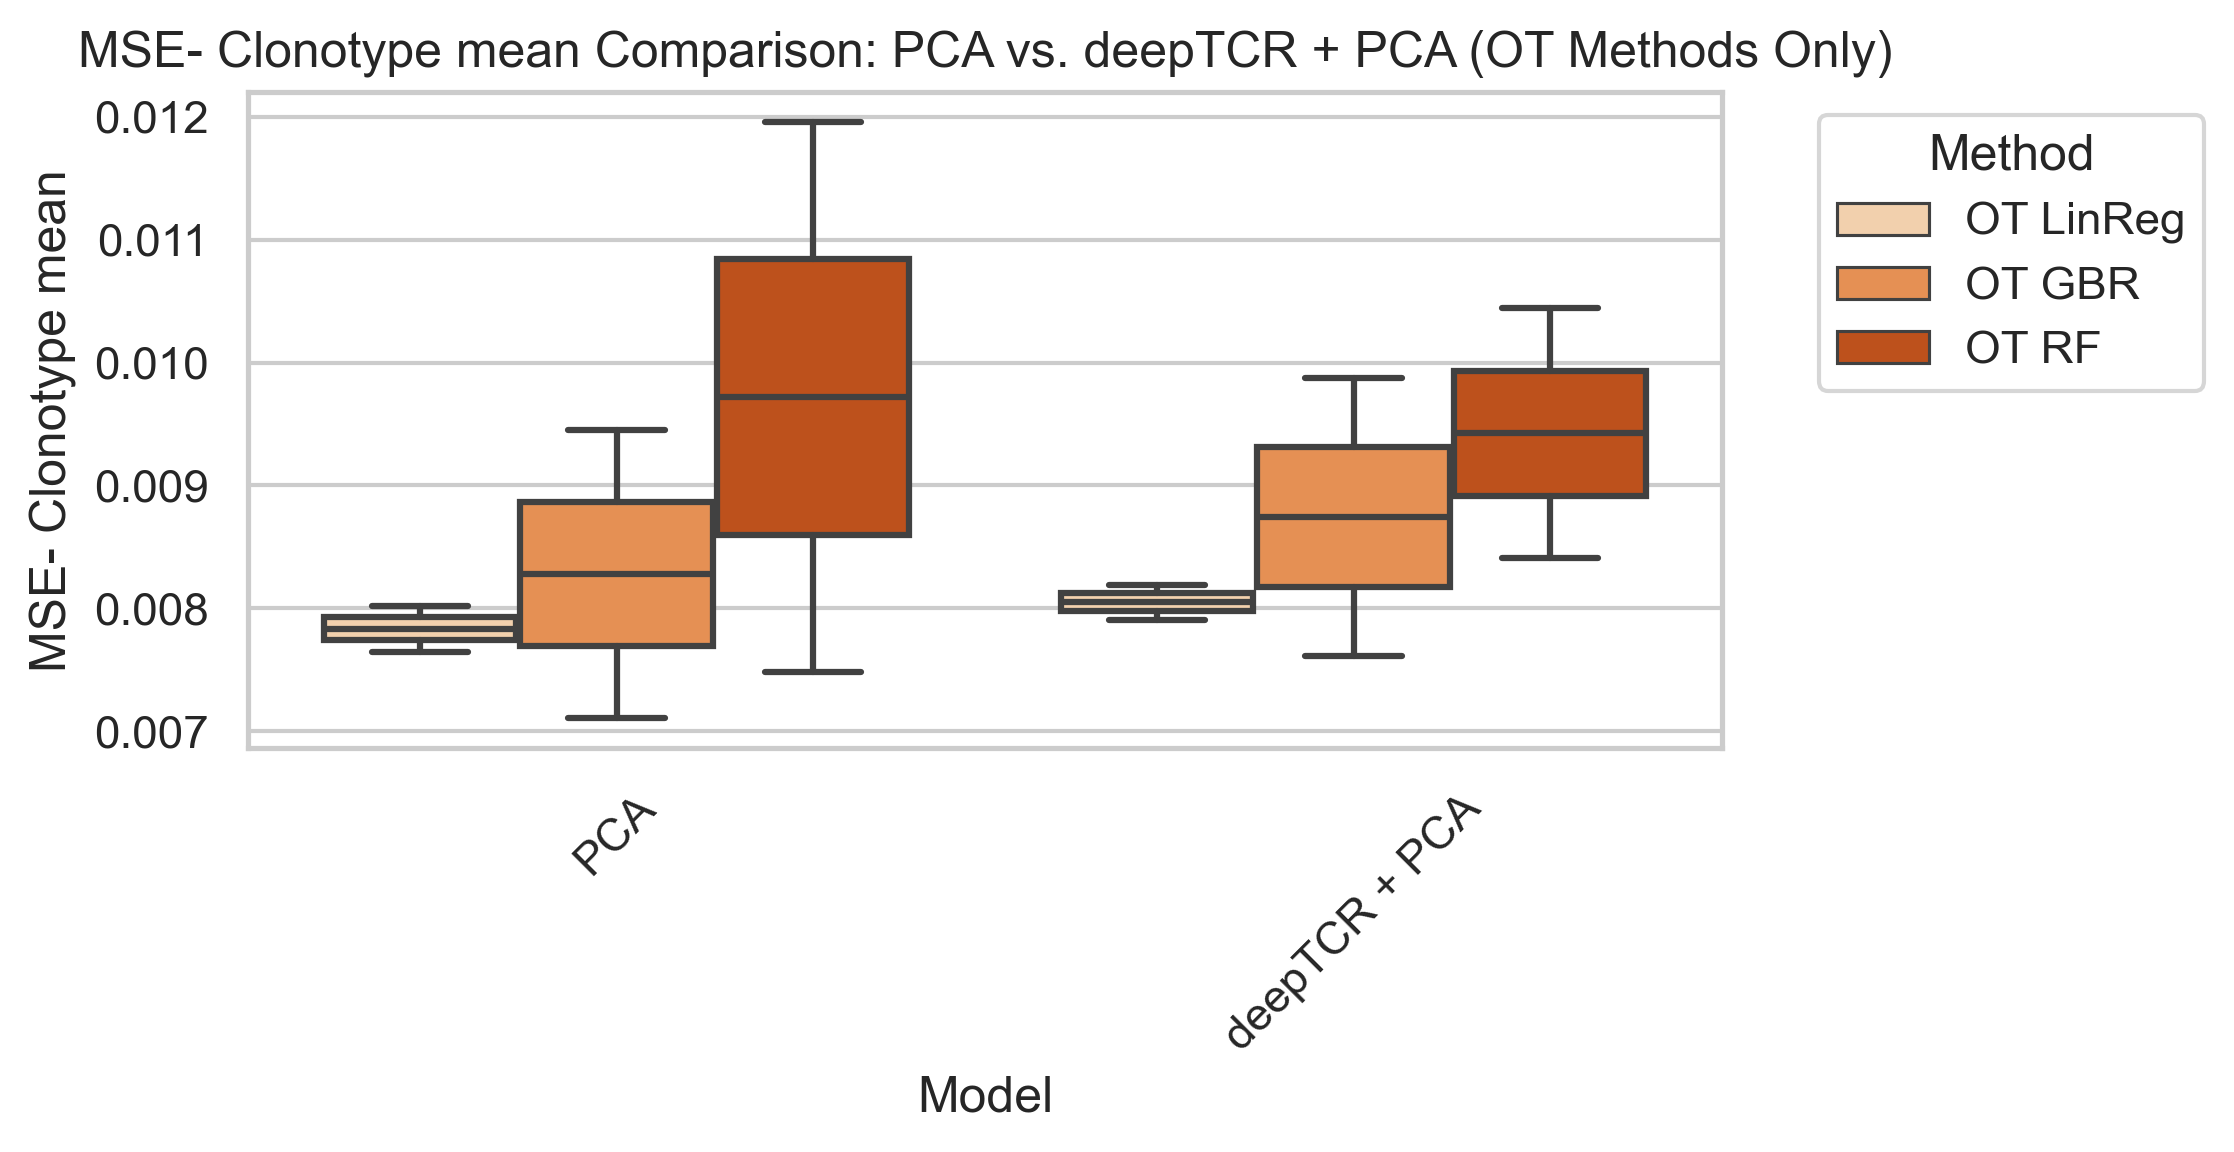

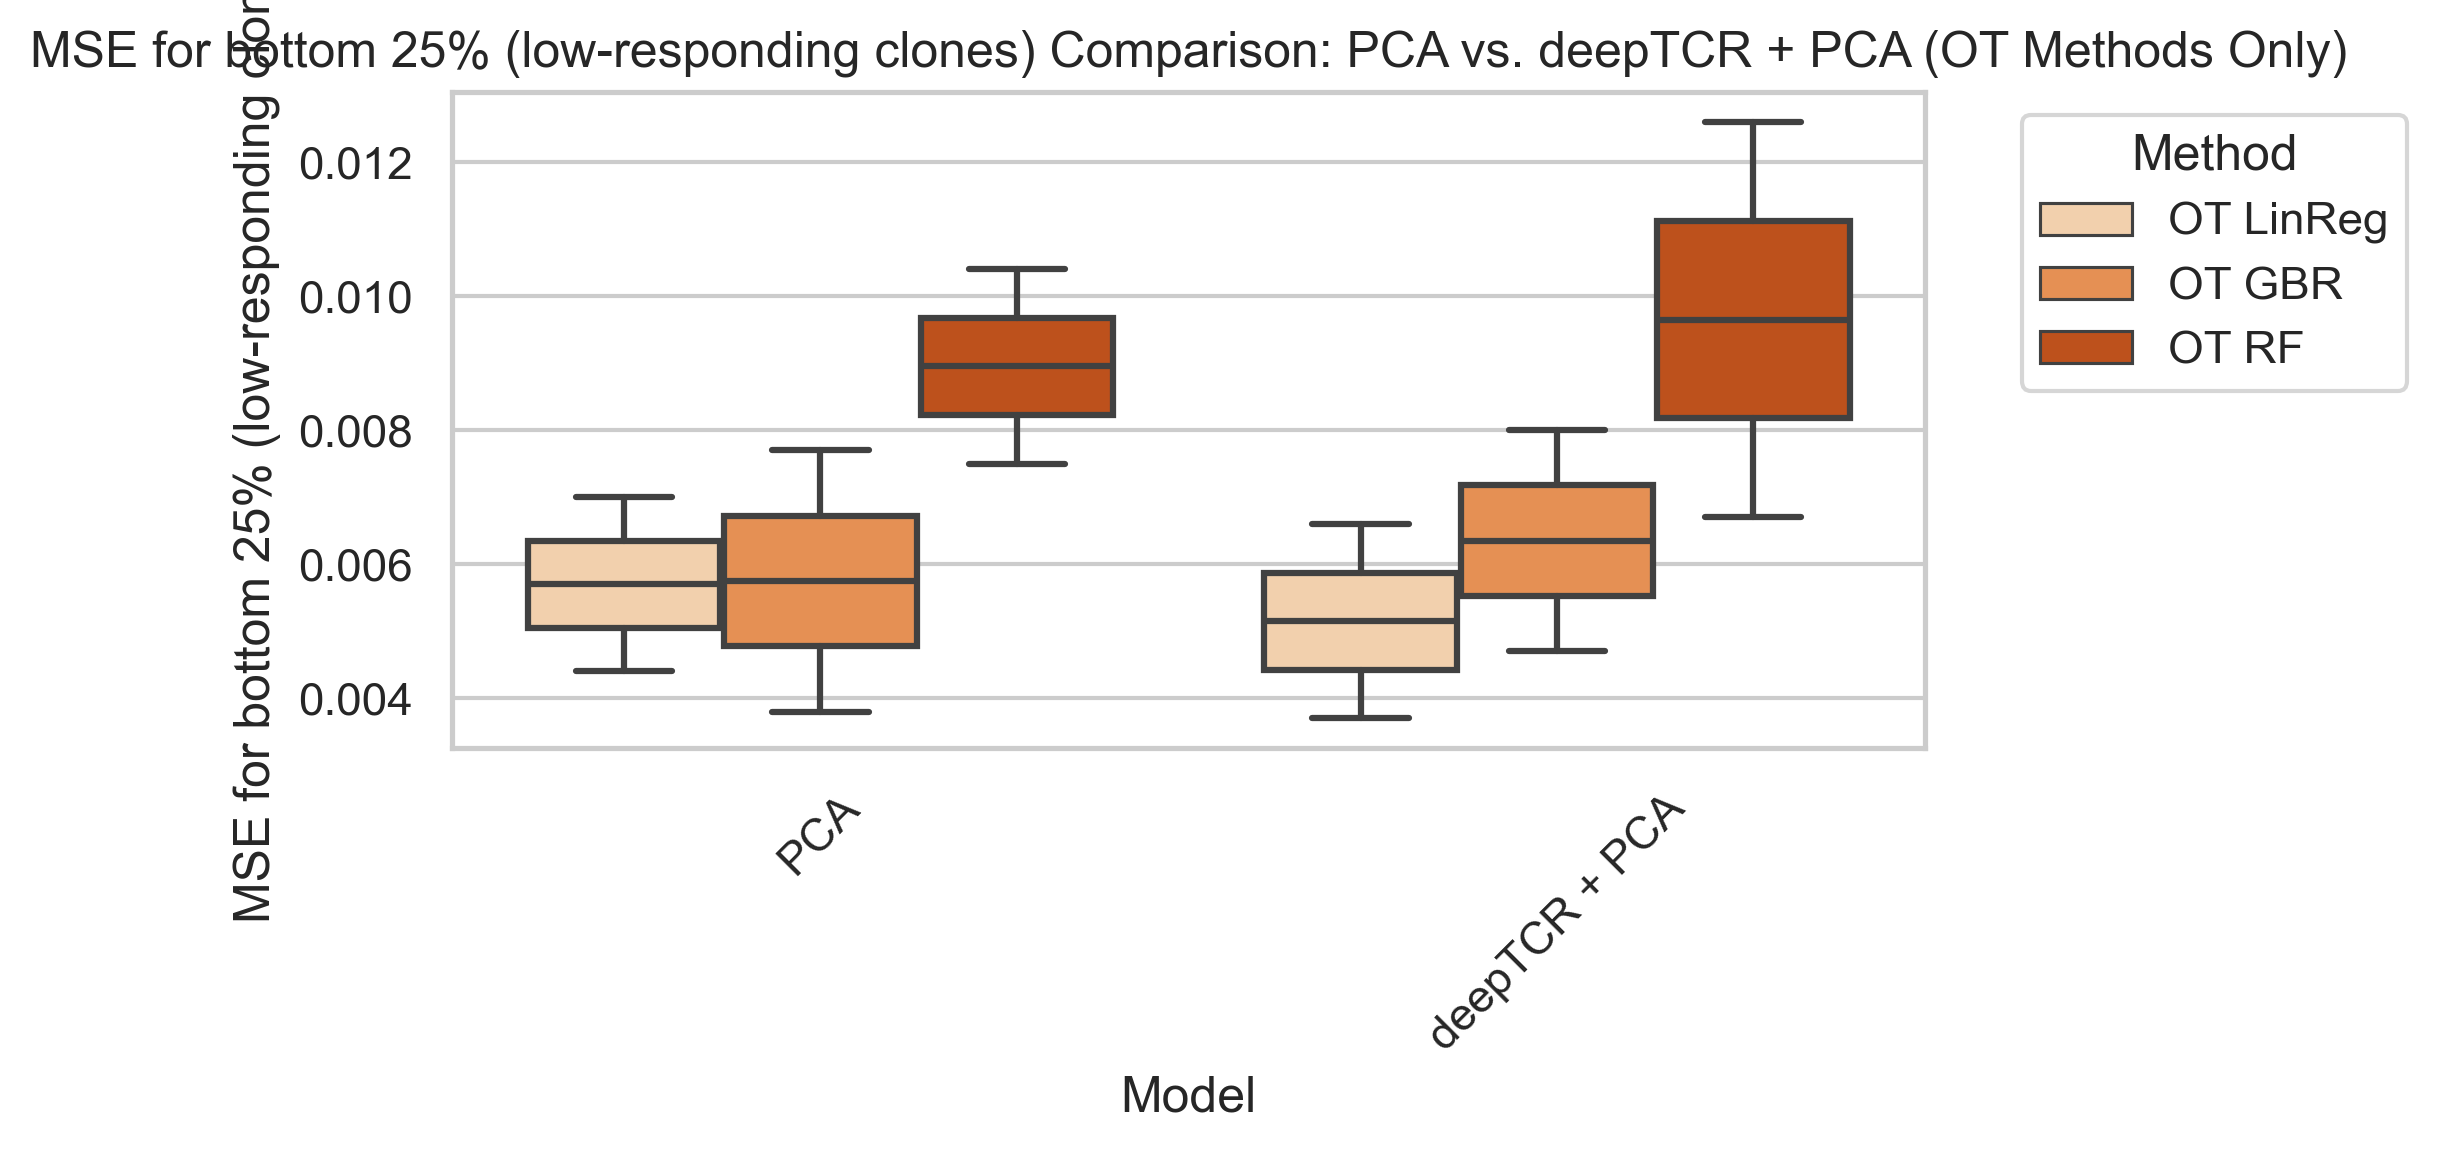

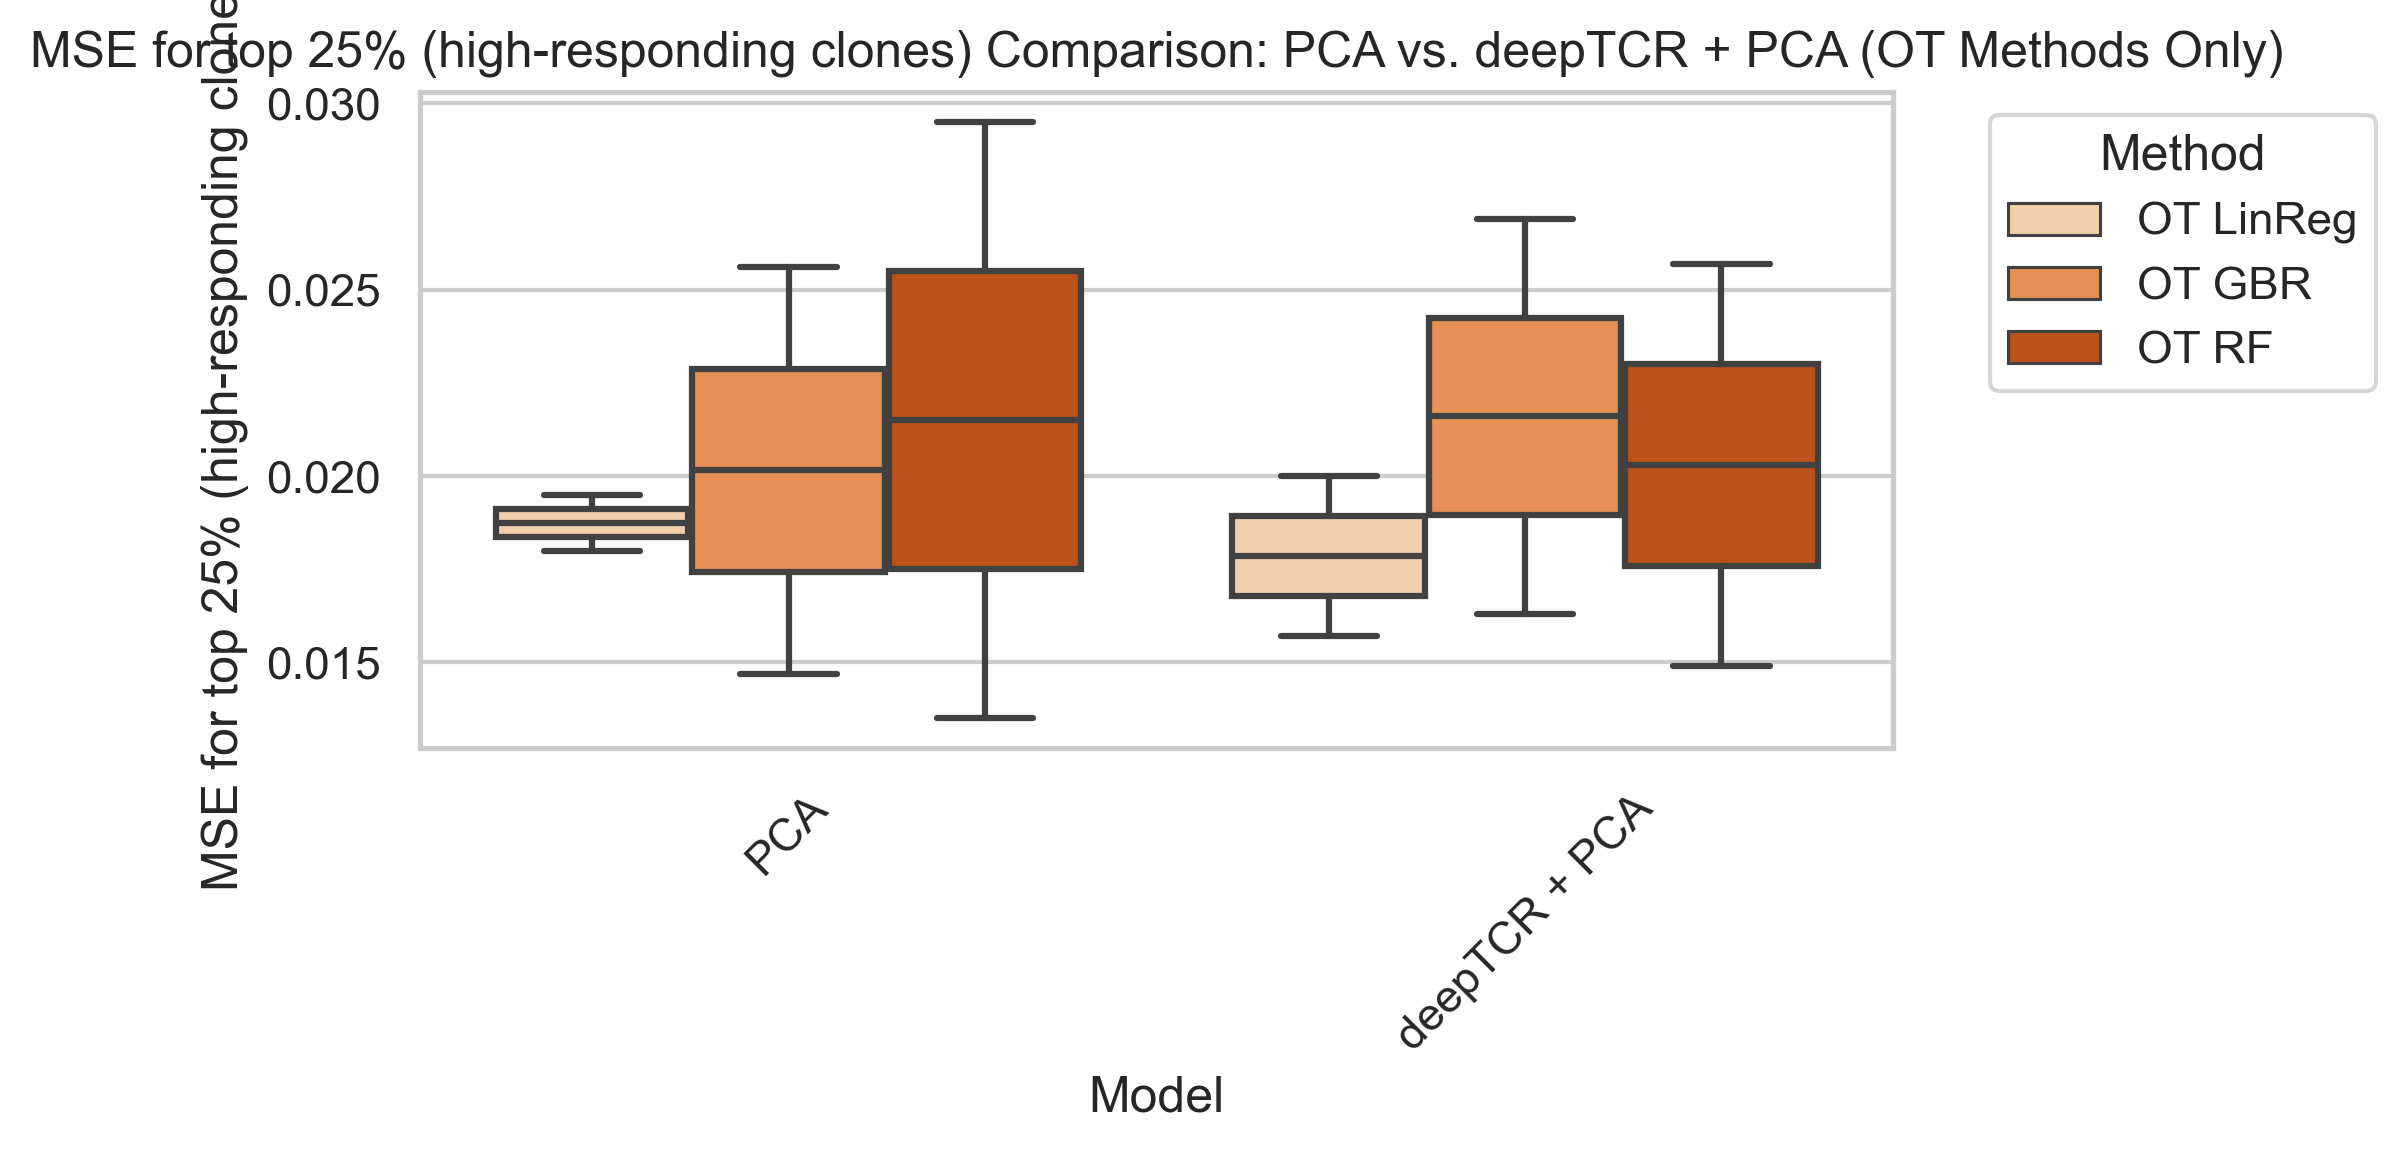

In [200]:
metrics = df_subset['Metric'].unique()

for metric in metrics:
    # Subset for this metric
    df_metric = df_subset[df_subset['Metric'] == metric]
    
    plt.figure(figsize=(6, 4))
    sns.boxplot(
        data=df_metric,
        x='Model',
        y='Value',
        hue='Method',
        palette=color_dict
    )
    
    # Title, labels, legend
    plt.title(f'{metric} Comparison: PCA vs. deepTCR + PCA (OT Methods Only)')
    plt.xlabel('Model')
    plt.ylabel(metric)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.legend(title='Method', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()

In [202]:
df_s1 = df_recall[df_recall['Timepoint'] == 'S1']
df_t1 = df_recall[df_recall['Timepoint'] == 'T1']

In [209]:
method_order = [
    "Baseline",
    "Timepoint LinReg",
    "Timepoint GBR",
    "Timepoint RF",
    "Donor LinReg",
    "Donor GBR",
    "Donor RF",
    "OT LinReg",
    "OT GBR",
    "OT RF"
]

In [210]:
# Pivot for S1
df_s1_pivot = df_s1.pivot_table(
    index='Model',
    columns='Method',
    values='Value',
    aggfunc='mean'  # or another function if multiple rows per (Model,Method)
)

# Reindex columns to preserve custom order (any missing columns become NaN)
df_s1_pivot = df_s1_pivot.reindex(columns=method_order)

# Pivot for T1
df_t1_pivot = df_t1.pivot_table(
    index='Model',
    columns='Method',
    values='Value',
    aggfunc='mean'
)

df_t1_pivot = df_t1_pivot.reindex(columns=method_order)

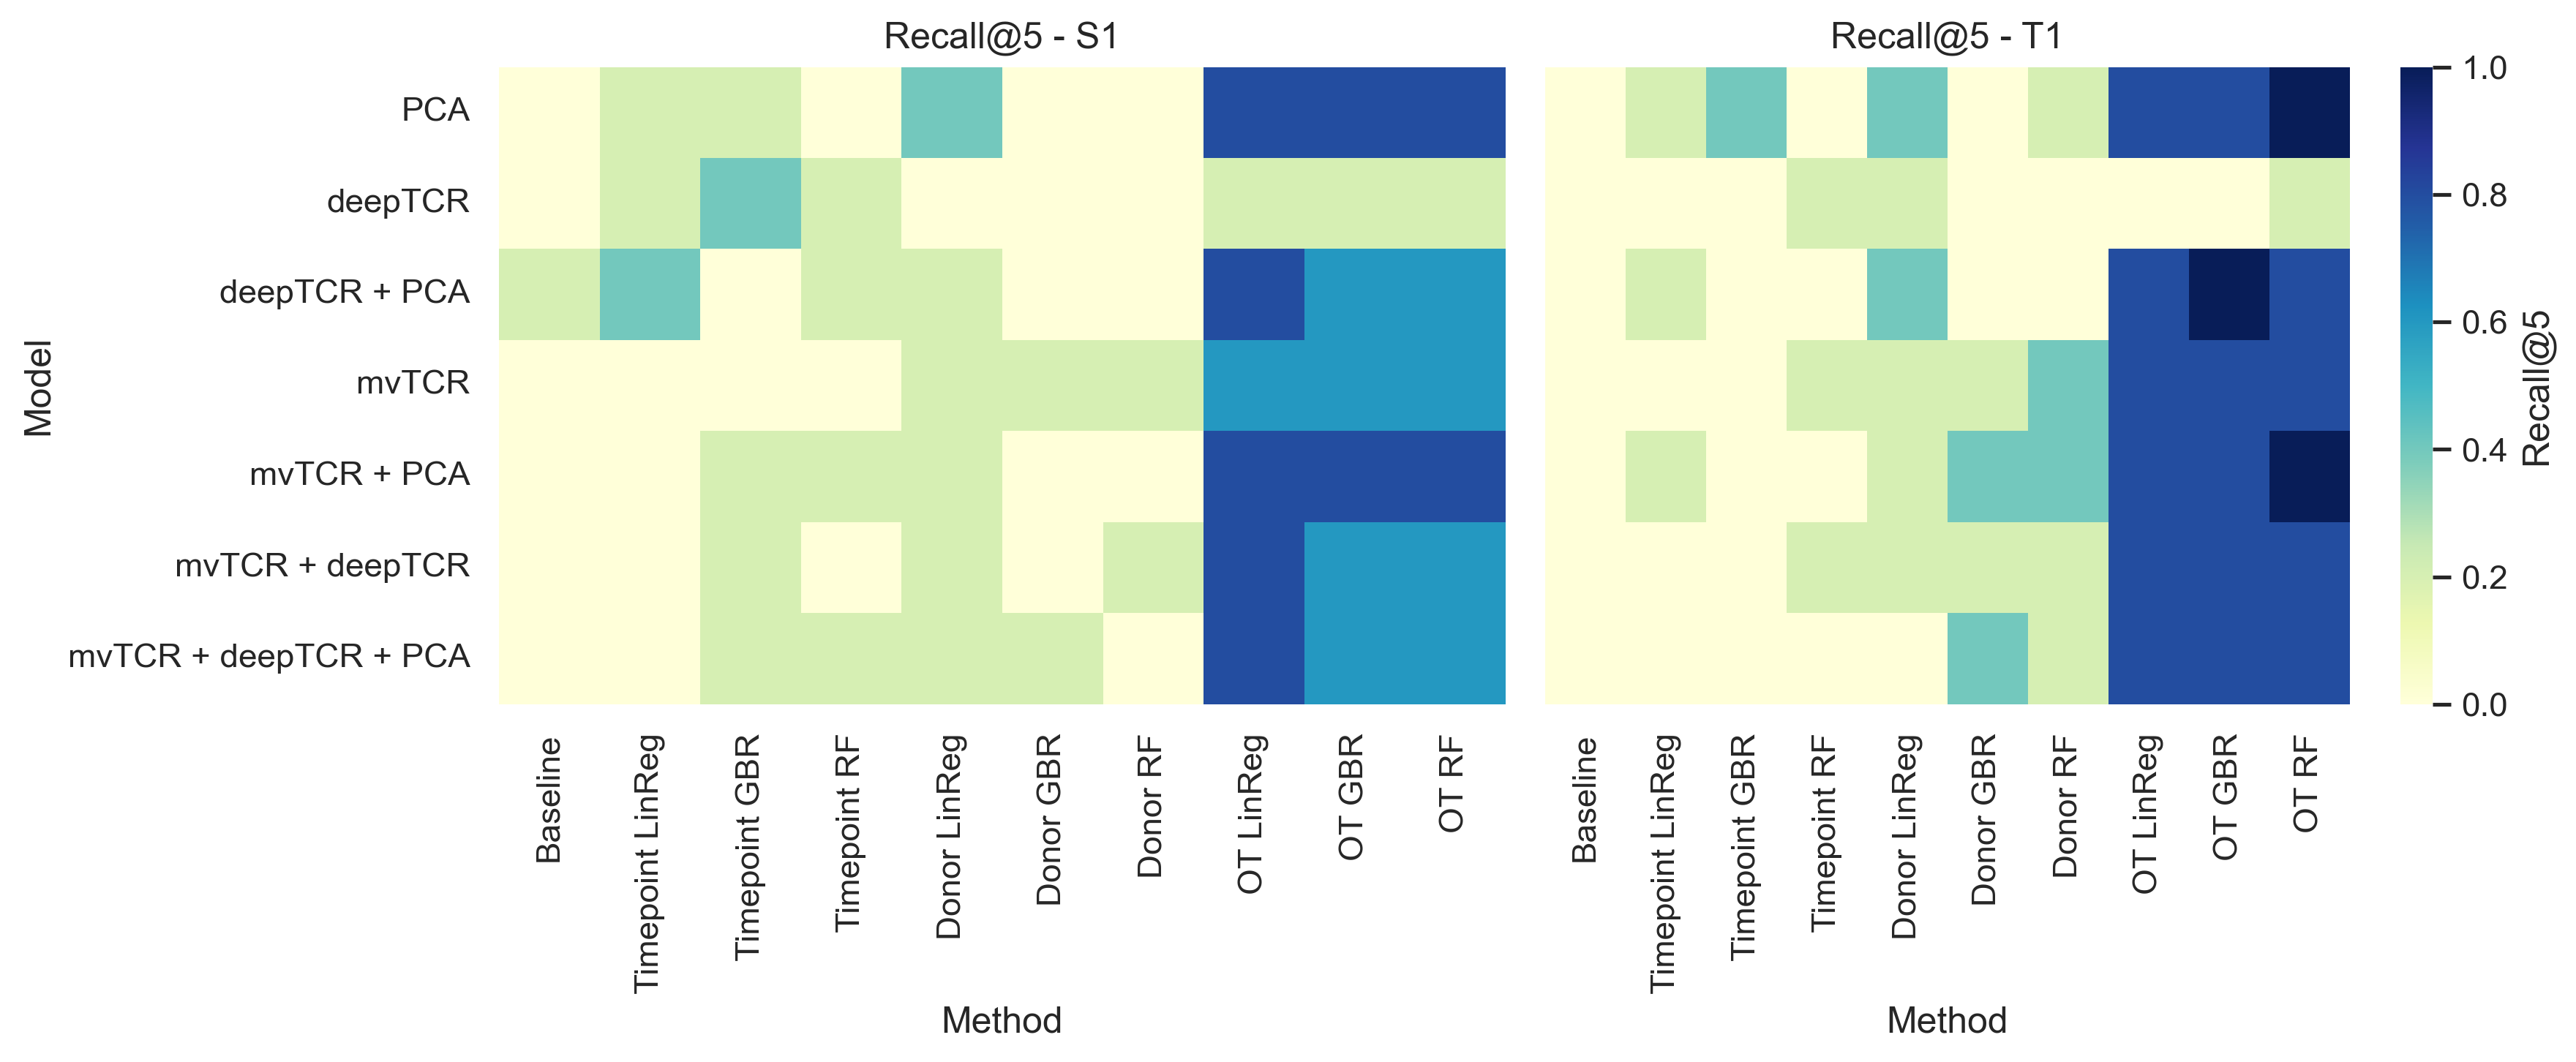

In [213]:
# 1. Find global min and max across both tables
#    We can stack (turn them into a single Series) and then concat to find the overall range.
combined_values = pd.concat([
    df_s1_pivot.stack(),
    df_t1_pivot.stack()
])
vmin = combined_values.min()
vmax = combined_values.max()

# 2. Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

# 3. First heatmap (S1) - no colorbar
sns.heatmap(
    df_s1_pivot,
    ax=ax1,
    cmap='YlGnBu',
    annot=False,    # show numeric values in cells
    fmt='.3f',     # decimal format
    vmin=vmin,
    vmax=vmax,
    cbar=False
)
ax1.set_title('Recall@5 - S1')
ax1.set_xlabel('Method')
ax1.set_ylabel('Model')

# 4. Second heatmap (T1) - with colorbar
im = sns.heatmap(
    df_t1_pivot,
    ax=ax2,
    cmap='YlGnBu',
    annot=False,
    fmt='.3f',
    vmin=vmin,
    vmax=vmax,
    cbar=True      # enable colorbar here
)
ax2.set_title('Recall@5 - T1')
ax2.set_xlabel('Method')
ax2.set_ylabel('')  # omit, since sharey=True

# 5. (Optional) Label the single colorbar
cbar = ax2.collections[0].colorbar
cbar.set_label('Recall@5')

plt.tight_layout()
plt.show()

In [215]:
df_s1 = df_mse[df_mse['Timepoint'] == 'S1']
df_t1 = df_mse[df_mse['Timepoint'] == 'T1']

In [216]:
# Pivot for S1
df_s1_pivot = df_s1.pivot_table(
    index='Model',
    columns='Method',
    values='Value',
    aggfunc='mean'  # or another function if multiple rows per (Model,Method)
)

# Reindex columns to preserve custom order (any missing columns become NaN)
df_s1_pivot = df_s1_pivot.reindex(columns=method_order)

# Pivot for T1
df_t1_pivot = df_t1.pivot_table(
    index='Model',
    columns='Method',
    values='Value',
    aggfunc='mean'
)

df_t1_pivot = df_t1_pivot.reindex(columns=method_order)

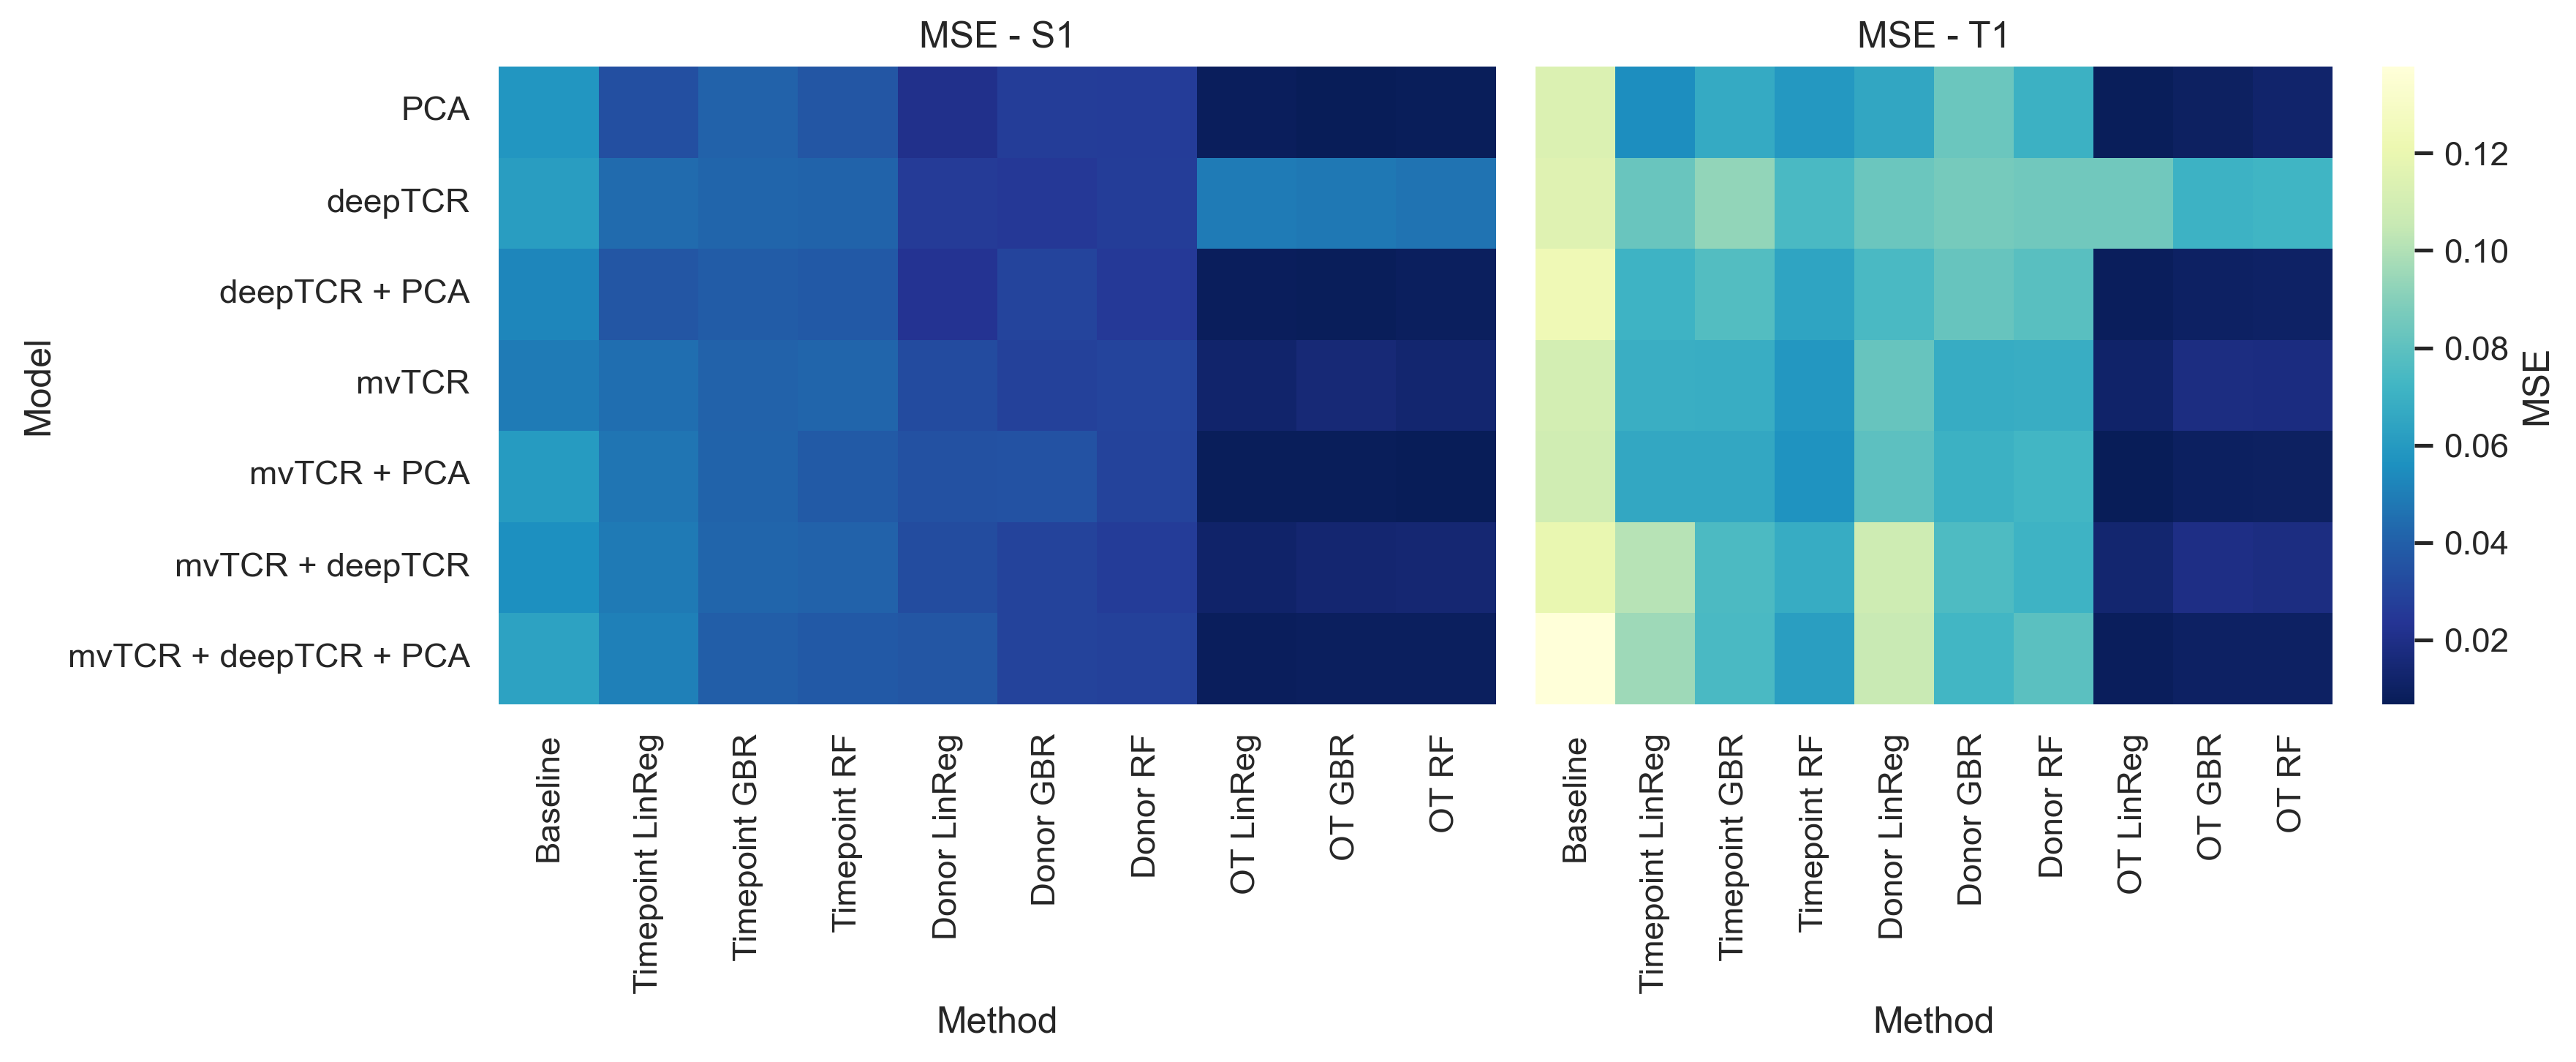

In [219]:
# 3. Create side-by-side subplots
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(12, 5))

# 4. First heatmap (S1) - no colorbar
sns.heatmap(
    df_s1_pivot,
    ax=ax1,
    cmap='YlGnBu_r',  # reversed palette
    annot=False,
    fmt='.3f',
    vmin=vmin,
    vmax=vmax,
    cbar=False
)
ax1.set_title('MSE - S1')
ax1.set_xlabel('Method')
ax1.set_ylabel('Model')

# 5. Second heatmap (T1) - with colorbar
im = sns.heatmap(
    df_t1_pivot,
    ax=ax2,
    cmap='YlGnBu_r',  # reversed palette
    annot=False,
    fmt='.3f',
    vmin=vmin,
    vmax=vmax,
    cbar=True
)
ax2.set_title('MSE - T1')
ax2.set_xlabel('Method')
ax2.set_ylabel('')  # omit label, since sharey=True

# 6. Single colorbar label
cbar = ax2.collections[0].colorbar
cbar.set_label('MSE')

plt.tight_layout()
plt.show()